# Examining Imputation methods within PFAS group
## keep research within PFAS, since prediction models using variables outside of PFAS group prove less accurate


**First show ability to accurately predict PFAS chemicals (chloe's work)** <br>
**Then indicate that this motivates an attempt at successful imputation of missing values** <br>
**Start by imputing intentional missingness and assessing** <br>
**Then after assessing different percentages of missingness, apply imputation to actual dataset, where we have unknown missing values**<br>
**But how to assess this?**



##Dependencies

In [ ]:
from google.colab import drive
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
!pip install xport

In [ ]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


##PFAS dataframe

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS_nan = df_PFAS.copy()
df_PFAS=df_PFAS.dropna()

In [ ]:
df_PFAS.head()
#print(len(df_PFAS.columns), len(df_PFAS_nan.columns))
print((df_PFAS_nan.size-df_PFAS.size)/df_PFAS_nan.size)
print(df_PFAS.size, df_PFAS_nan.size, df_PFAS_nan.size-df_PFAS.size)

0.07310816588285592
36856 39763 2907


##making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [ ]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [ ]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [ ]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81,
 'LBDVTPLC': 0.03,
 'LBDVVBLC': 0.0,
 'LBDVXYLC': 63.52,
 

In [ ]:
len(d_p)

131

In [ ]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [ ]:
type(d_p)
L2=np.array(list(d_p.items()))

##Decide which we can treat as binary


In [ ]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 25 or val >= 75)}

In [ ]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [ ]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [ ]:
len(binary_list)

17

In [ ]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,LBDBSELC,LBDBMNLC,LBDFORLC,URDDEELC,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

In [ ]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

##which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [ ]:
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
print(len(intersection_list))

0


In [ ]:
intersection_list

[]

In [ ]:
#percentage of what is binary in df
len(intersection_list)/len(df_PFAS)*100

0.0

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)
cols_to_drop

[]

In [ ]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_PFAS=df_PFAS.drop(columns=cols_to_drop)
df_PFAS_nan = df_PFAS_nan.drop(columns = cols_to_drop)

In [ ]:
df_PFAS.size
df_PFAS_nan.size
print(df_PFAS.size, df_PFAS_nan.size)
print((df_PFAS_nan.size-df_PFAS.size)/df_PFAS_nan.size)

36856 39763
0.07310816588285592


## sorting / splitting binary and continuous codes

In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = df_PFAS.columns[df_PFAS.isin([0,1]).all()]
bin_nan = df_PFAS_nan.columns[df_PFAS.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA

#for col in df_PFAS.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  #if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    #df_PFAS[col] = np.log(df_PFAS[col])
    #df_PFAS_nan[col] = np.log(df_PFAS_nan[col])

In [ ]:
bin_dict = {
    'LBDPFDEL' : 'LBXPFDE',
    'LBDPFHSL' : 'LBXPFHS',
    'LBDMPAHL' : 'LBXMPAH',
    'LBDPFBSL' : 'LBXPFBS',
    'LBDPFHPL' : 'LBXPFHP',
    'LBDPFNAL' : 'LBXPFNA',
    'LBDPFUAL' : 'LBXPFUA',
    'LBDPFDOL' : 'LBDPFDOL',
}

In [ ]:
cont_dict = {v: k for k, v in bin_dict.items()}

In [ ]:
# detection limits dictionary for keys in bin_dict
detect_limits = {
    'LBDPFDEL' : 0.10,
    'LBDPFHSL' : 0.10,
    'LBDMPAHL' : 0.10,
    'LBDPFBSL' : 0.10, 
    'LBDPFHPL' : 0.10, 
    'LBDPFNAL' : 0.10,
    'LBDPFUAL' : 0.10, 
    'LBDPFDOL' : 0.10,
}

In [ ]:
df_PFAS_nan.head()

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.2,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.3,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.1,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.2,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.1,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0


# splitting train and test set <br>
predicting detection level of Perfluorodecanoic acid (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)

#removing the related chemical, and detection comment code (no cheating!!)
#X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
#X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])

#Y_train=train['LBXPFDE']
#Y_test=test['LBXPFDE']

cont_data = df_PFAS.copy()
cont_data = cont_data.drop(columns = bin.tolist())

bin_data = df_PFAS.copy()
bin_data = bin_data[bin]

In [ ]:
print(cont_data.isna().sum().sum(), test.isna().sum().sum())

0 0


#make different versions for binary and continuous

In [ ]:
#filtering column names with all 0 and 1 values
train_cont= train.copy()
train_bin= train.copy()
test_cont= test.copy()
test_bin= test.copy()

train_bin = train_bin[bin]
test_bin = test_bin[bin]

train_cont = train_cont.drop(columns = bin.tolist())
test_cont = test_cont.drop(columns = bin.tolist())

In [ ]:
train_bin['SEQN'] = df_PFAS['SEQN']
test_bin['SEQN'] = df_PFAS['SEQN']

train_bin = train_bin.set_index('SEQN')
test_bin = test_bin.set_index('SEQN')

train_cont = train_cont.set_index('SEQN')
test_cont = test_cont.set_index('SEQN')

bin_data['SEQN'] = df_PFAS['SEQN']
bin_data = bin_data.set_index('SEQN')
cont_data = cont_data.set_index('SEQN')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
cont_dict = {
 'LBXMPAH'  : 'LBDMPAHL',
 'LBXPFBS'  : 'LBDPFBSL',
 'LBXPFDE'  : 'LBDPFDEL',
 'LBXPFDO' : 'LBDPFDOL',
 'LBXPFHP'  : 'LBDPFHPL',
 'LBXPFHS'  : 'LBDPFHSL',
 'LBXPFNA'  : 'LBDPFNAL',
 'LBXPFUA'  : 'LBDPFUAL'
}

# ------ 42% Missing, all columns -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,NaN,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,NaN,NaN,0.20,0.07,0.07,NaN,0.07,0.07
73574.0,NaN,0.2,0.07,0.07,NaN,0.7,NaN,NaN
73576.0,NaN,NaN,0.07,0.07,NaN,0.6,0.07,NaN
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,NaN,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=20, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.         3.         0.2        ... 0.5        0.1        0.07      ]
 [0.16127918 1.82886687 0.2        ... 0.59393999 0.07       0.07      ]
 [0.38813196 0.2        0.07       ... 0.7        0.37895372 0.09389306]
 ...
 [0.54071475 1.1        0.27037128 ... 1.5        0.5        0.08321225]
 [0.2        1.89319278 0.07       ... 0.87616581 0.35619833 0.07      ]
 [0.08834824 1.7        0.07       ... 0.42132965 0.07       0.07      ]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0     0.000000  3.000000  0.200000  0.070000  0.070000  0.500000  0.100000   
1     0.161279  1.828867  0.200000  0.070000  0.070000  0.593940  0.070000   
2     0.388132  0.200000  0.070000  0.070000  0.075630  0.700000  0.378954   
3     0.146765  2.074014  0.070000  0.070000  0.080464  0.600000  0.070000   
4     0.100000  1.200000  0.070000  0.070000  0.070000  0.400000  0.121445   
...        ...       ...       ...       ...       ...       ...       ...   
2163  0.07

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression

bin_pred_round = bin_missing.copy()

imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=20, random_state=0, min_value=0)   
bin_imputed = imp.fit_transform(bin_missing)
bin_pred_round = pd.DataFrame(bin_imputed, columns = bin_missing.columns)
bin_pred_round = round(bin_pred_round)
print(bin_imputed, bin_pred_round, sep='\n')

[[0.         0.         0.         ... 0.         0.         1.        ]
 [0.50073902 0.00950834 0.         ... 0.         1.         1.        ]
 [0.08323714 0.         1.         ... 0.         0.57856154 0.72576248]
 ...
 [0.         0.         0.45587368 ... 0.         0.         0.73805074]
 [0.         0.         1.         ... 0.         0.69442855 1.        ]
 [0.20066325 0.         1.         ... 0.         1.         1.        ]]
      LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0          0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1          1.0       0.0       0.0       1.0       1.0       0.0       1.0   
2          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
4          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
...        ...       ...       ...       ...       ...       ...       ...   
2163      

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,NaN,NaN,0.0,1.0,1.0,NaN,1.0,1.0
73574.0,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN
73576.0,NaN,NaN,1.0,1.0,NaN,0.0,1.0,NaN
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73576.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_42a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_42a)

0.18551340936007213


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.000000,3.000000,0.20,0.07,0.070000,0.50000,0.100000,0.070000
1,0.161279,1.828867,0.20,0.07,0.070000,0.59394,0.070000,0.070000
2,0.388132,0.200000,0.07,0.07,0.075630,0.70000,0.378954,0.093893
3,0.146765,2.074014,0.07,0.07,0.080464,0.60000,0.070000,0.067955
4,0.100000,1.200000,0.07,0.07,0.070000,0.40000,0.121445,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_42a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_42a)

0.43071267610795033


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
bin_pred_round_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])
    bin_pred_round_ROC.append(bin_pred_round.iloc[row][bin_col])

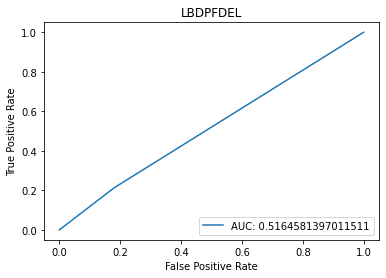

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=3)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.001041  0.105662  0.045936      0.0  0.000000  0.026494  0.000684   
1  0.001041  0.084025  0.045936      0.0  0.000000  0.024440  0.000000   
2  0.005791  0.004688  0.000000      0.0  0.059361  0.038817  0.003727   
3  0.003188  0.041952  0.000000      0.0  0.000000  0.032656  0.000000   
4  0.000586  0.040750  0.000000      0.0  0.000000  0.020333  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.006345  
3  0.006345  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       0.0   
3       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       0.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_42a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_42a)

1.5110151119344648


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_42a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_42a)

1.2292335465380306


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm42 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm42.columns:
  geomean = stats.gmean(cont_pred_gm42.dropna()[col])
  for row in range(len(cont_pred_gm42)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm42[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm42.isna().sum().sum()

0

In [ ]:
cont_pred_gm42.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.212736,3.000000,0.20,0.07,0.070000,0.500000,0.100000,0.070000
73571.0,0.212736,1.504202,0.20,0.07,0.070000,0.667844,0.070000,0.070000
73574.0,0.212736,0.200000,0.07,0.07,0.077641,0.700000,0.118414,0.082601
73576.0,0.212736,1.504202,0.07,0.07,0.077641,0.600000,0.070000,0.082601
73577.0,0.100000,1.200000,0.07,0.07,0.070000,0.400000,0.118414,0.070000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_42a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_42a)

0.08740431035274981


In [ ]:
# setting squared=False gives RMSE

rmse_gm_42a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_42a)

0.2956421998848436


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73576.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


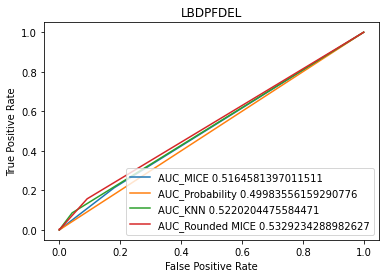

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_42a, tpr_MICE_42a, threshold_MICE_42a = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_42a = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_42a, tpr_prob_42a, threshold_prob_42a = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_42a = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_round_42a, tpr_round_42a, threshold_round_42a = metrics.roc_curve(bin_data_ROC, bin_pred_round_ROC)
auc_round_42a = metrics.roc_auc_score(bin_data_ROC, bin_pred_round_ROC)

fpr_KNN_42a, tpr_KNN_42a, threshold_KNN_42a = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_42a = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_42a, tpr_MICE_42a, label='AUC_MICE '+str(auc_MICE_42a))
plt.plot(fpr_prob_42a, tpr_prob_42a, label='AUC_Probability '+str(auc_prob_42a))
plt.plot(fpr_KNN_42a, tpr_KNN_42a, label='AUC_KNN '+str(auc_KNN_42a))
plt.plot(fpr_round_42a, tpr_round_42a, label='AUC_Rounded MICE '+str(auc_round_42a))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_42a = []
cont_data_KNN_42a = []
cont_data_true_42a = []
cont_data_gm_42a = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_42a.append(cont_pred.iloc[row][col])
    cont_data_KNN_42a.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_42a.append(cont_data.iloc[row][col])
    cont_data_gm_42a.append(cont_pred_gm42.iloc[row][col])

# ------ 42% Missing, ridge -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,NaN,0.07
73571.0,NaN,NaN,NaN,0.07,0.07,1.3,0.07,0.07
73574.0,NaN,0.2,0.07,0.07,0.07,NaN,0.07,0.07
73576.0,0.2,7.6,0.07,NaN,NaN,0.6,NaN,0.10
73577.0,NaN,NaN,0.07,0.07,0.07,NaN,0.07,NaN


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
imp = IterativeImputer(estimator=Ridge(),
    max_iter=20, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        3.         0.2        ... 0.5        0.02862371 0.07      ]
 [0.09540194 3.26376349 0.23159598 ... 1.3        0.07       0.07      ]
 [0.11700852 0.2        0.07       ... 0.31704508 0.07       0.07      ]
 ...
 [0.54309219 1.1        0.18324883 ... 1.5        0.5        0.12858624]
 [0.2        1.4        0.14696261 ... 0.64219357 0.12953172 0.07      ]
 [0.07       0.40746791 0.09497915 ... 0.3        0.07       0.07      ]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0     0.200000  3.000000  0.200000  0.070000  0.070000  0.500000  0.028624   
1     0.095402  3.263763  0.231596  0.070000  0.070000  1.300000  0.070000   
2     0.117009  0.200000  0.070000  0.070000  0.070000  0.317045  0.070000   
3     0.200000  7.600000  0.070000  0.070502  0.098002  0.600000  0.000000   
4     0.148774  1.779901  0.070000  0.070000  0.070000  0.681622  0.070000   
...        ...       ...       ...       ...       ...       ...       ...   
2163  0.07

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression

bin_pred_round = bin_missing.copy()

imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=20, random_state=0, min_value=0)   
bin_imputed = imp.fit_transform(bin_missing)
bin_pred_round = pd.DataFrame(bin_imputed, columns = bin_missing.columns)
bin_pred_round = round(bin_pred_round)
print(bin_imputed, bin_pred_round, sep='\n')

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.17390379e-01 1.00000000e+00]
 [4.10192745e-01 5.23362174e-04 5.30363078e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [4.94873561e-01 0.00000000e+00 1.00000000e+00 ... 7.37726618e-03
  1.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 5.89620154e-01 ... 0.00000000e+00
  0.00000000e+00 7.59644440e-01]
 [0.00000000e+00 0.00000000e+00 4.68964074e-01 ... 0.00000000e+00
  4.64237838e-01 1.00000000e+00]
 [1.00000000e+00 6.83222403e-03 7.45933380e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]]
      LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0          0.0       0.0       0.0       1.0       1.0       0.0       1.0   
1          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
2          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3          0.0       0.0       1.0       1.0       1.0       0.0       0.0   
4         

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,1.0
73571.0,NaN,NaN,NaN,1.0,1.0,0.0,1.0,1.0
73574.0,NaN,0.0,1.0,1.0,1.0,NaN,1.0,1.0
73576.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0
73577.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73571.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_42a_ridge = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_42a_ridge)

0.954186343322464


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.200000,3.000000,0.200000,0.070000,0.070000,0.500000,0.028624,0.070000
1,0.095402,3.263763,0.231596,0.070000,0.070000,1.300000,0.070000,0.070000
2,0.117009,0.200000,0.070000,0.070000,0.070000,0.317045,0.070000,0.070000
3,0.200000,7.600000,0.070000,0.070502,0.098002,0.600000,0.000000,0.100000
4,0.148774,1.779901,0.070000,0.070000,0.070000,0.681622,0.070000,0.092534


In [ ]:
# setting squared=False gives RMSE

rmse_42a_ridge = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_42a_ridge)

0.976824622602473


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
bin_pred_round_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])
    bin_pred_round_ROC.append(bin_pred_round.iloc[row][bin_col])

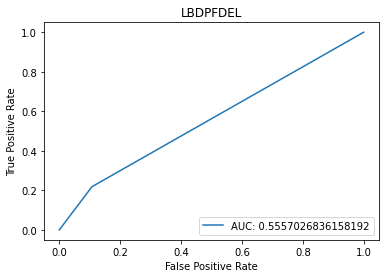

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS  LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.086610  0.020867      0.0      0.0  0.026494  0.000593   
1  0.005661  0.124268  0.045586      0.0      0.0  0.075786  0.000000   
2  0.000234  0.003843  0.000000      0.0      0.0  0.027726  0.000000   
3  0.002538  0.222584  0.000000      0.0      0.0  0.032656  0.000137   
4  0.020652  0.025539  0.000000      0.0      0.0  0.022428  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.041096  
4  0.180822  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       1.0       0.0       0.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_42a_ridge = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_42a_ridge)

1.509721919281179


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_42a_ridge = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_42a_ridge)

1.2287074180947957


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm42 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm42.columns:
  geomean = stats.gmean(cont_pred_gm42.dropna()[col])
  for row in range(len(cont_pred_gm42)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm42[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm42.isna().sum().sum()

0

In [ ]:
cont_pred_gm42.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.200000,3.000000,0.200000,0.07,0.070000,0.500000,0.111243,0.070000
73571.0,0.180003,1.318253,0.127724,0.07,0.070000,1.300000,0.070000,0.070000
73574.0,0.180003,0.200000,0.070000,0.07,0.070000,0.633475,0.070000,0.070000
73576.0,0.200000,7.600000,0.070000,0.07,0.074988,0.600000,0.111243,0.100000
73577.0,0.180003,1.318253,0.070000,0.07,0.070000,0.633475,0.070000,0.082182


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_42a_ridge = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_42a_ridge)

0.07164202571168657


In [ ]:
# setting squared=False gives RMSE

rmse_gm_42a_ridge = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_42a_ridge)

0.26766028041472006


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73571.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73574.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


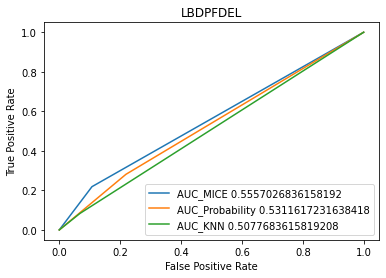

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_42a_ridge, tpr_MICE_42a_ridge, threshold_MICE_42a_ridge = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_42a_ridge = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_42a_ridge, tpr_prob_42a_ridge, threshold_prob_42a_ridge = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_42a_ridge = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_round_42a_ridge, tpr_round_42a_ridge, threshold_round_42a_ridge = metrics.roc_curve(bin_data_ROC, bin_pred_round_ROC)
auc_round_42a_ridge = metrics.roc_auc_score(bin_data_ROC, bin_pred_round_ROC)

fpr_KNN_42a_ridge, tpr_KNN_42a_ridge, threshold_KNN_42a_ridge = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_42a_ridge = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_42a_ridge, tpr_MICE_42a_ridge, label='AUC_MICE '+str(auc_MICE_42a_ridge))
plt.plot(fpr_prob_42a_ridge, tpr_prob_42a_ridge, label='AUC_Probability '+str(auc_prob_42a_ridge))
plt.plot(fpr_KNN_42a_ridge, tpr_KNN_42a_ridge, label='AUC_KNN '+str(auc_KNN_42a_ridge))
#plt.plot(fpr_round_42a_ridge, tpr_round_42a_ridge, label='AUC_Rounded MICE '+str(auc_round_42a_ridge))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_42a_ridge = []
cont_data_KNN_42a_ridge = []
cont_data_true_42a_ridge = []
cont_data_gm_42a_ridge = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_42a_ridge.append(cont_pred.iloc[row][col])
    cont_data_KNN_42a_ridge.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_42a_ridge.append(cont_data.iloc[row][col])
    cont_data_gm_42a_ridge.append(cont_pred_gm42.iloc[row][col])

# ------ 42% Missing, linear regression -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,NaN,0.07,0.07,0.5,NaN,NaN
73571.0,0.3,NaN,NaN,0.07,0.07,NaN,0.07,NaN
73574.0,NaN,0.2,0.07,0.07,NaN,0.7,NaN,0.07
73576.0,NaN,NaN,NaN,0.07,0.20,NaN,NaN,NaN
73577.0,NaN,NaN,0.07,0.07,0.07,0.4,NaN,NaN


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
imp = IterativeImputer(estimator=LinearRegression(),
    max_iter=20, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        3.         0.09857781 ... 0.5        0.04451579 0.08613416]
 [0.3        2.51495431 0.09956812 ... 0.49400636 0.07       0.11142832]
 [0.         0.2        0.07       ... 0.7        0.19511113 0.07      ]
 ...
 [0.9        1.1        0.07       ... 1.5        0.5        0.23955927]
 [0.         2.15138537 0.07       ... 0.8        0.07       0.07      ]
 [0.21889919 1.84199667 0.17331409 ... 0.77758383 0.16734297 0.09876773]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0     0.200000  3.000000  0.098578  0.070000  0.070000  0.500000  0.044516   
1     0.300000  2.514954  0.099568  0.070000  0.070000  0.494006  0.070000   
2     0.000000  0.200000  0.070000  0.070000  0.056092  0.700000  0.195111   
3     0.226338  2.606419  0.521506  0.070000  0.200000  0.910135  0.000000   
4     0.203540  1.846437  0.070000  0.070000  0.070000  0.400000  0.070574   
...        ...       ...       ...       ...       ...       ...       ...   
2163  0.00

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression

bin_pred_round = bin_missing.copy()

imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=20, random_state=0, min_value=0)   
bin_imputed = imp.fit_transform(bin_missing)
bin_pred_round = pd.DataFrame(bin_imputed, columns = bin_missing.columns)
bin_pred_round = round(bin_pred_round)
print(bin_imputed, bin_pred_round, sep='\n')

[[0.         0.         0.62102968 ... 0.         0.33024612 0.89436393]
 [0.         0.         0.71203789 ... 0.04325591 1.         1.02961458]
 [0.21148428 0.         1.         ... 0.         0.79281808 1.        ]
 ...
 [0.         0.         1.         ... 0.         0.         0.45326053]
 [0.3434115  0.         1.         ... 0.         1.         1.        ]
 [0.15058699 0.         0.52866359 ... 0.         0.47745676 0.81572772]]
      LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0          0.0       0.0       1.0       1.0       1.0       0.0       0.0   
1          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
2          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3          0.0       0.0       0.0       1.0       0.0       0.0       0.0   
4          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
...        ...       ...       ...       ...       ...       ...       ...   
2163      

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,NaN,1.0,1.0,0.0,NaN,NaN
73571.0,0.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN
73574.0,NaN,0.0,1.0,1.0,NaN,0.0,NaN,1.0
73576.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
73577.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73571.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
73574.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73576.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_42a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_42a_linreg)

0.0835825459989648


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.200000,3.000000,0.098578,0.07,0.070000,0.500000,0.044516,0.086134
1,0.300000,2.514954,0.099568,0.07,0.070000,0.494006,0.070000,0.111428
2,0.000000,0.200000,0.070000,0.07,0.056092,0.700000,0.195111,0.070000
3,0.226338,2.606419,0.521506,0.07,0.200000,0.910135,0.000000,0.037213
4,0.203540,1.846437,0.070000,0.07,0.070000,0.400000,0.070574,0.086601


In [ ]:
# setting squared=False gives RMSE

rmse_42a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_42a_linreg)

0.2891064613580347


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
bin_pred_round_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])
    bin_pred_round_ROC.append(bin_pred_round.iloc[row][bin_col])

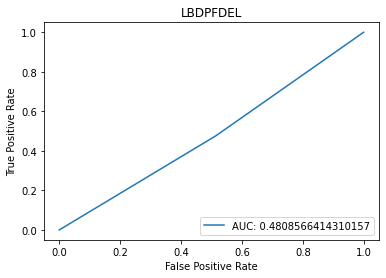

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.105662  0.009310      0.0  0.000000  0.047097  0.000000   
1  0.004490  0.156870  0.013804      0.0  0.000000  0.058050  0.000000   
2  0.000234  0.004688  0.000000      0.0  0.000000  0.069003  0.031871   
3  0.012961  0.060224  0.060674      0.0  0.105691  0.062432  0.062818   
4  0.002030  0.037865  0.000000      0.0  0.000000  0.036145  0.058199   

    LBXPFDO  
0  0.003807  
1  0.003807  
2  0.000000  
3  0.000000  
4  0.003807  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       1.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       0.0   
3       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       0.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_42a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_42a_linreg)

1.5097283489223596


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_42a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_42a_linreg)

1.228710034516834


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm42 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm42.columns:
  geomean = stats.gmean(cont_pred_gm42.dropna()[col])
  for row in range(len(cont_pred_gm42)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm42[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm42.isna().sum().sum()

0

In [ ]:
cont_pred_gm42.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.200000,3.00000,0.110814,0.07,0.070000,0.500000,0.11873,0.083659
73571.0,0.300000,1.31191,0.110814,0.07,0.070000,0.649943,0.07000,0.083659
73574.0,0.166262,0.20000,0.070000,0.07,0.076385,0.700000,0.11873,0.070000
73576.0,0.166262,1.31191,0.110814,0.07,0.200000,0.649943,0.11873,0.083659
73577.0,0.166262,1.31191,0.070000,0.07,0.070000,0.400000,0.11873,0.083659


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_42a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_42a_linreg)

0.07091103592209279


In [ ]:
# setting squared=False gives RMSE

rmse_gm_42a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_42a_linreg)

0.2662912614452318


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


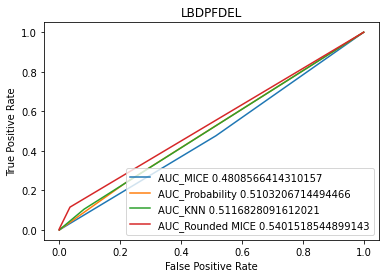

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_42a_linreg, tpr_MICE_42a_linreg, threshold_MICE_42a_linreg = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_42a_linreg = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_42a_linreg, tpr_prob_42a_linreg, threshold_prob_42a_linreg = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_42a_linreg = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_round_42a_linreg, tpr_round_42a_linreg, threshold_round_42a_linreg = metrics.roc_curve(bin_data_ROC, bin_pred_round_ROC)
auc_round_42a_linreg = metrics.roc_auc_score(bin_data_ROC, bin_pred_round_ROC)

fpr_KNN_42a_linreg, tpr_KNN_42a_linreg, threshold_KNN_42a_linreg = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_42a_linreg = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_42a_linreg, tpr_MICE_42a_linreg, label='AUC_MICE '+str(auc_MICE_42a_linreg))
plt.plot(fpr_prob_42a_linreg, tpr_prob_42a_linreg, label='AUC_Probability '+str(auc_prob_42a_linreg))
plt.plot(fpr_KNN_42a_linreg, tpr_KNN_42a_linreg, label='AUC_KNN '+str(auc_KNN_42a_linreg))
plt.plot(fpr_round_42a_linreg, tpr_round_42a_linreg, label='AUC_Rounded MICE '+str(auc_round_42a_linreg))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_42a_linreg = []
cont_data_KNN_42a_linreg = []
cont_data_true_42a_linreg = []
cont_data_gm_42a_linreg = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_42a_linreg.append(cont_pred.iloc[row][col])
    cont_data_KNN_42a_linreg.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_42a_linreg.append(cont_data.iloc[row][col])
    cont_data_gm_42a_linreg.append(cont_pred_gm42.iloc[row][col])

# ------ 42% Missing, lasso -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,NaN,NaN,0.07,NaN,NaN,0.10,0.07
73571.0,NaN,NaN,NaN,NaN,0.07,1.3,0.07,NaN
73574.0,NaN,0.2,NaN,0.07,0.07,0.7,0.07,NaN
73576.0,NaN,7.6,NaN,0.07,0.20,0.6,NaN,NaN
73577.0,NaN,1.2,NaN,0.07,0.07,0.4,NaN,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso
imp = IterativeImputer(estimator=Lasso(),
    max_iter=20, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        1.90461781 0.18607229 ... 0.88160976 0.1        0.07      ]
 [0.24529859 1.90461781 0.18607229 ... 1.3        0.07       0.098405  ]
 [0.24529859 0.2        0.18607229 ... 0.7        0.07       0.098405  ]
 ...
 [0.9        1.1        0.07       ... 0.88160976 0.8070733  0.3       ]
 [0.2        1.4        0.07       ... 0.88160976 0.10502202 0.07      ]
 [0.07       1.90461781 0.07       ... 0.3        0.07       0.07      ]]
       LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP  LBXPFNA   LBXPFUA  \
0     0.200000  1.904618  0.186072  0.07000  0.082803  0.88161  0.100000   
1     0.245299  1.904618  0.186072  0.07068  0.070000  1.30000  0.070000   
2     0.245299  0.200000  0.186072  0.07000  0.070000  0.70000  0.070000   
3     0.321541  7.600000  0.186072  0.07000  0.200000  0.60000  0.227579   
4     0.321541  1.200000  0.186072  0.07000  0.070000  0.40000  0.227579   
...        ...       ...       ...      ...       ...      ...       ...   
2163  0.321541  0.600000

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression

bin_pred_round = bin_missing.copy()

imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=20, random_state=0, min_value=0)   
bin_imputed = imp.fit_transform(bin_missing)
bin_pred_round = pd.DataFrame(bin_imputed, columns = bin_missing.columns)
bin_pred_round = round(bin_pred_round)
print(bin_imputed, bin_pred_round, sep='\n')

[[0.         0.         0.18053025 ... 0.         0.         1.        ]
 [0.44603855 0.         0.69949721 ... 0.         1.         0.89495198]
 [0.45033407 0.         0.7379213  ... 0.         1.         0.92800214]
 ...
 [0.         0.         1.         ... 0.00975179 0.19640255 0.        ]
 [0.         0.         1.         ... 0.         0.68575867 1.        ]
 [1.         0.0756972  1.         ... 0.         1.         1.        ]]
      LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0          0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
2          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3          0.0       0.0       0.0       1.0       0.0       0.0       1.0   
4          0.0       0.0       1.0       1.0       1.0       0.0       1.0   
...        ...       ...       ...       ...       ...       ...       ...   
2163      

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,1.0
73571.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN
73574.0,NaN,0.0,NaN,1.0,1.0,0.0,1.0,NaN
73576.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,NaN
73577.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
73577.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_42a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_42a_lasso)

0.07598408944596763


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.200000,1.904618,0.186072,0.07000,0.082803,0.88161,0.100000,0.070000
1,0.245299,1.904618,0.186072,0.07068,0.070000,1.30000,0.070000,0.098405
2,0.245299,0.200000,0.186072,0.07000,0.070000,0.70000,0.070000,0.098405
3,0.321541,7.600000,0.186072,0.07000,0.200000,0.60000,0.227579,0.098405
4,0.321541,1.200000,0.186072,0.07000,0.070000,0.40000,0.227579,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_42a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_42a_lasso)

0.2756521167086653


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
bin_pred_round_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])
    bin_pred_round_ROC.append(bin_pred_round.iloc[row][bin_col])

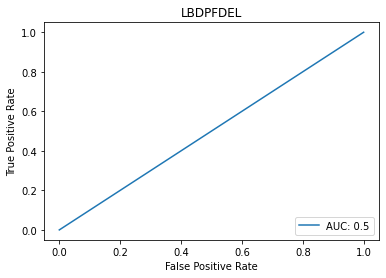

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.087201  0.000000  0.000000  0.000000  0.036352  0.000388   
1  0.005700  0.051729  0.026324  0.026087  0.000000  0.075786  0.000000   
2  0.002303  0.003843  0.000000  0.000000  0.000000  0.038817  0.000000   
3  0.004255  0.222584  0.005136  0.000000  0.206349  0.032656  0.000336   
4  0.004255  0.033402  0.026645  0.000000  0.000000  0.020333  0.000672   

    LBXPFDO  
0  0.000000  
1  0.003807  
2  0.000000  
3  0.003807  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       1.0       0.0       0.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_42a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_42a_lasso)

1.5111628426135153


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_42a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_42a_lasso)

1.229293635635325


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm42 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm42.columns:
  geomean = stats.gmean(cont_pred_gm42.dropna()[col])
  for row in range(len(cont_pred_gm42)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm42[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm42.isna().sum().sum()

0

In [ ]:
cont_pred_gm42.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.200000,1.152677,0.12865,0.07,0.076971,0.682395,0.100000,0.07000
73571.0,0.183102,1.152677,0.12865,0.07,0.070000,1.300000,0.070000,0.08274
73574.0,0.183102,0.200000,0.12865,0.07,0.070000,0.700000,0.070000,0.08274
73576.0,0.183102,7.600000,0.12865,0.07,0.200000,0.600000,0.118638,0.08274
73577.0,0.183102,1.200000,0.12865,0.07,0.070000,0.400000,0.118638,0.07000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_42a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_42a_lasso)

0.0919030655758559


In [ ]:
# setting squared=False gives RMSE

rmse_gm_42a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_42a_lasso)

0.30315518398314734


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
73574.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


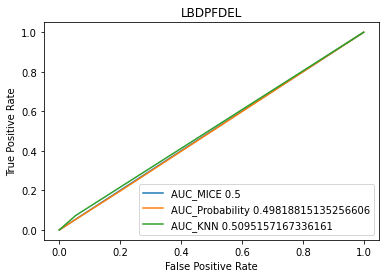

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_42a_lasso, tpr_MICE_42a_lasso, threshold_MICE_42a_lasso = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_42a_lasso = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_42a_lasso, tpr_prob_42a_lasso, threshold_prob_42a = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_42a_lasso = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_round_42a_lasso, tpr_round_42a_lasso, threshold_round_42a_lasso = metrics.roc_curve(bin_data_ROC, bin_pred_round_ROC)
auc_round_42a_lasso = metrics.roc_auc_score(bin_data_ROC, bin_pred_round_ROC)

fpr_KNN_42a_lasso, tpr_KNN_42a_lasso, threshold_KNN_42a_lasso = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_42a_lasso = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_42a_lasso, tpr_MICE_42a_lasso, label='AUC_MICE '+str(auc_MICE_42a_lasso))
plt.plot(fpr_prob_42a_lasso, tpr_prob_42a_lasso, label='AUC_Probability '+str(auc_prob_42a_lasso))
plt.plot(fpr_KNN_42a_lasso, tpr_KNN_42a_lasso, label='AUC_KNN '+str(auc_KNN_42a_lasso))
#plt.plot(fpr_round_42a_lasso, tpr_round_42a_lasso, label='AUC_Rounded MICE '+str(auc_round_42a_lasso))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_42a_lasso = []
cont_data_KNN_42a_lasso = []
cont_data_true_42a_lasso = []
cont_data_gm_42a_lasso = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_42a_lasso.append(cont_pred.iloc[row][col])
    cont_data_KNN_42a_lasso.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_42a_lasso.append(cont_data.iloc[row][col])
    cont_data_gm_42a_lasso.append(cont_pred_gm42.iloc[row][col])

# ------ 42% Missing, all columns -------- 
## 20 iterations
## 3 neighbors

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,NaN,3.0,NaN,NaN,NaN,0.5,NaN,0.07
73571.0,0.3,2.0,NaN,0.07,0.07,1.3,0.07,0.07
73574.0,NaN,NaN,NaN,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,NaN,NaN,0.20,0.6,0.07,NaN
73577.0,0.1,NaN,0.07,NaN,NaN,NaN,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=20, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.28088575 3.         0.21196225 ... 0.5        0.23920465 0.07      ]
 [0.3        2.         0.20177872 ... 1.3        0.07       0.07      ]
 [0.16969708 1.75125828 0.1920721  ... 0.7        0.07       0.07      ]
 ...
 [0.00387353 2.86915618 0.21538345 ... 1.5        0.5        0.3       ]
 [0.20515681 1.4        0.18645224 ... 0.8        0.07       0.07      ]
 [0.22309914 1.7        0.1863999  ... 0.3        0.22090815 0.07      ]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0     0.280886  3.000000  0.211962  0.069997  0.082874  0.500000  0.239205   
1     0.300000  2.000000  0.201779  0.070000  0.070000  1.300000  0.070000   
2     0.169697  1.751258  0.192072  0.070000  0.070000  0.700000  0.070000   
3     0.200000  7.600000  0.299517  0.074654  0.200000  0.600000  0.070000   
4     0.100000  1.541692  0.070000  0.072264  0.083116  0.583894  0.070000   
...        ...       ...       ...       ...       ...       ...       ...   
2163  0.09

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,1.0
73571.0,0.0,0.0,NaN,1.0,1.0,0.0,1.0,1.0
73574.0,NaN,NaN,NaN,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN
73577.0,0.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_42a_203 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_42a_203)

0.5727612782016528


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.280886,3.000000,0.211962,0.069997,0.082874,0.500000,0.239205,0.070000
1,0.300000,2.000000,0.201779,0.070000,0.070000,1.300000,0.070000,0.070000
2,0.169697,1.751258,0.192072,0.070000,0.070000,0.700000,0.070000,0.070000
3,0.200000,7.600000,0.299517,0.074654,0.200000,0.600000,0.070000,0.087915
4,0.100000,1.541692,0.070000,0.072264,0.083116,0.583894,0.070000,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_42a_203 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_42a_203)

0.7568099353217113


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

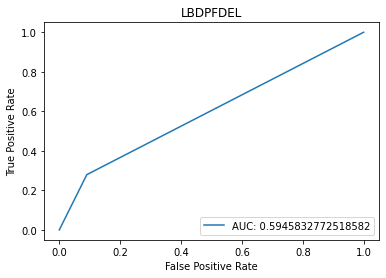

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=3)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA  LBXPFUA  LBXPFDO
0  0.003644  0.086610  0.078117      0.0  0.008130  0.026494      0.0      0.0
1  0.004490  0.057050  0.065811      0.0  0.000000  0.075786      0.0      0.0
2  0.001692  0.091536  0.044409      0.0  0.000000  0.038817      0.0      0.0
3  0.002538  0.222584  0.001605      0.0  0.105691  0.032656      0.0      0.0
4  0.000586  0.067888  0.000000      0.0  0.000000  0.036763      0.0      0.0


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=3)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_42a_203 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_42a_203)

1.510173035903519


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_42a_203 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_42a_203)

1.228890978038133


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm42_203 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm42_203.columns:
  geomean = stats.gmean(cont_pred_gm42_203.dropna()[col])
  for row in range(len(cont_pred_gm42_203)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm42_203[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm42_203.isna().sum().sum()

0

In [ ]:
cont_pred_gm42_203.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.185147,3.000000,0.11475,0.070692,0.079298,0.500000,0.116601,0.070000
73571.0,0.300000,2.000000,0.11475,0.070000,0.070000,1.300000,0.070000,0.070000
73574.0,0.185147,1.435725,0.11475,0.070000,0.070000,0.700000,0.070000,0.070000
73576.0,0.200000,7.600000,0.11475,0.070692,0.200000,0.600000,0.070000,0.082509
73577.0,0.100000,1.435725,0.07000,0.070692,0.079298,0.676985,0.070000,0.070000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_42a_203 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42_203['LBXPFDE']) 
print(mse_gm_42a_203)

0.07332588759180675


In [ ]:
# setting squared=False gives RMSE

rmse_gm_42a_203 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42_203['LBXPFDE'], squared=False)
print(rmse_gm_42a_203)

0.27078753219416646


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73571.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


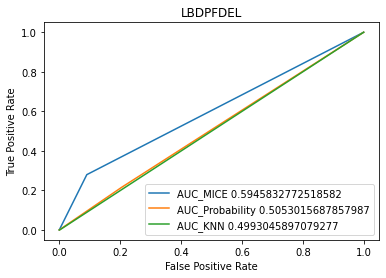

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_42a_203, tpr_MICE_42a_203, threshold_MICE_42a_203 = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_42a_203 = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_42a_203, tpr_prob_42a_203, threshold_prob_42a_203 = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_42a_203 = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_42a_203, tpr_KNN_42a_203, threshold_KNN_42a_203 = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_42a_203 = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_42a_203, tpr_MICE_42a_203, label='AUC_MICE '+str(auc_MICE_42a_203))
plt.plot(fpr_prob_42a_203, tpr_prob_42a_203, label='AUC_Probability '+str(auc_prob_42a_203))
plt.plot(fpr_KNN_42a_203, tpr_KNN_42a_203, label='AUC_KNN '+str(auc_KNN_42a_203))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_42a_203 = []
cont_data_KNN_42a_203 = []
cont_data_true_42a_203 = []
cont_data_gm_42a_203 = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_42a_203.append(cont_pred.iloc[row][col])
    cont_data_KNN_42a_203.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_42a_203.append(cont_data.iloc[row][col])
    cont_data_gm_42a_203.append(cont_pred_gm42.iloc[row][col])

# ------ 42% Missing, all columns -------- 
## 30 iterations
## 7 neighbors

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,NaN,0.20,NaN,0.07,NaN,NaN,0.07
73571.0,NaN,NaN,0.20,0.07,NaN,NaN,0.07,NaN
73574.0,NaN,NaN,0.07,0.07,0.07,NaN,NaN,0.07
73576.0,0.2,NaN,NaN,0.07,0.20,NaN,NaN,0.10
73577.0,0.1,NaN,NaN,0.07,0.07,NaN,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=30, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        2.08010961 0.2        ... 0.80886102 0.16641875 0.07      ]
 [0.         1.42224119 0.2        ... 0.27841659 0.07       0.08427094]
 [0.09984375 2.31141799 0.07       ... 0.91673563 0.19227387 0.07      ]
 ...
 [0.9        1.1        0.20122815 ... 1.5        0.5        0.12811906]
 [0.2        2.50528971 0.20691736 ... 0.8        0.07       0.07      ]
 [0.         1.65395784 0.16480767 ... 0.38520785 0.07       0.08002338]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0     0.200000  2.080110  0.200000  0.070789  0.070000  0.808861  0.166419   
1     0.000000  1.422241  0.200000  0.070000  0.078717  0.278417  0.070000   
2     0.099844  2.311418  0.070000  0.070000  0.070000  0.916736  0.192274   
3     0.200000  1.129233  0.335463  0.070000  0.200000  0.751768  0.096247   
4     0.100000  2.084982  0.177629  0.070000  0.070000  0.581651  0.070000   
...        ...       ...       ...       ...       ...       ...       ...   
2163  0.07

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0
73571.0,NaN,NaN,0.0,1.0,NaN,NaN,1.0,NaN
73574.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0
73576.0,0.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0
73577.0,0.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73576.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_42a_307 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_42a_307)

0.12234314045859701


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.200000,2.080110,0.200000,0.070789,0.070000,0.808861,0.166419,0.070000
1,0.000000,1.422241,0.200000,0.070000,0.078717,0.278417,0.070000,0.084271
2,0.099844,2.311418,0.070000,0.070000,0.070000,0.916736,0.192274,0.070000
3,0.200000,1.129233,0.335463,0.070000,0.200000,0.751768,0.096247,0.100000
4,0.100000,2.084982,0.177629,0.070000,0.070000,0.581651,0.070000,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_42a_307 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_42a_307)

0.3497758431604404


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

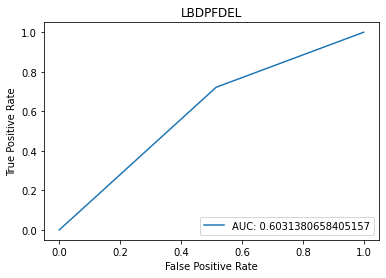

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=7)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.035936  0.020867      0.0  0.000000  0.071385  0.013962   
1  0.003012  0.118703  0.020867      0.0  0.000000  0.045859  0.000000   
2  0.003681  0.028757  0.000000      0.0  0.000000  0.034416  0.024682   
3  0.002538  0.048182  0.011236      0.0  0.105691  0.039697  0.003989   
4  0.000586  0.056205  0.061683      0.0  0.000000  0.032656  0.000000   

    LBXPFDO  
0  0.000000  
1  0.025440  
2  0.000000  
3  0.041096  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=7)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_42a_307 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_42a_307)

1.5091848960822312


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_42a_307 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_42a_307)

1.228488866893889


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm42_307 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm42_307.columns:
  geomean = stats.gmean(cont_pred_gm42_307.dropna()[col])
  for row in range(len(cont_pred_gm42_307)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm42_307[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm42_307.isna().sum().sum()

0

In [ ]:
cont_pred_gm42_307.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.200000,1.151257,0.200000,0.071014,0.070000,0.659527,0.116523,0.07000
73571.0,0.224021,1.151257,0.200000,0.070000,0.076305,0.659527,0.070000,0.08251
73574.0,0.224021,1.151257,0.070000,0.070000,0.070000,0.659527,0.116523,0.07000
73576.0,0.200000,1.151257,0.128555,0.070000,0.200000,0.659527,0.116523,0.10000
73577.0,0.100000,1.151257,0.128555,0.070000,0.070000,0.659527,0.070000,0.07000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_42a_307 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42_307['LBXPFDE']) 
print(mse_gm_42a_307)

0.06142098391895052


In [ ]:
# setting squared=False gives RMSE

rmse_gm_42a_307 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42_307['LBXPFDE'], squared=False)
print(rmse_gm_42a_307)

0.24783257235268838


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73571.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73576.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


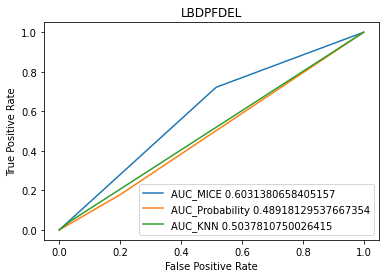

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_42a_307, tpr_MICE_42a_307, threshold_MICE_42a_307 = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_42a_307 = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_42a_307, tpr_prob_42a_307, threshold_prob_42a_307 = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_42a_307 = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_42a_307, tpr_KNN_42a_307, threshold_KNN_42a_307 = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_42a_307 = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_42a_307, tpr_MICE_42a_307, label='AUC_MICE '+str(auc_MICE_42a_307))
plt.plot(fpr_prob_42a_307, tpr_prob_42a_307, label='AUC_Probability '+str(auc_prob_42a_307))
plt.plot(fpr_KNN_42a_307, tpr_KNN_42a_307, label='AUC_KNN '+str(auc_KNN_42a_307))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_42a_307 = []
cont_data_KNN_42a_307 = []
cont_data_true_42a_307 = []
cont_data_gm_42a_307 = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_42a_307.append(cont_pred.iloc[row][col])
    cont_data_KNN_42a_307.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_42a_307.append(cont_data.iloc[row][col])
    cont_data_gm_42a_307.append(cont_pred_gm42.iloc[row][col])

# ------ 42% Missing, all columns -------- 
## 25 iterations
## 5 neighbors

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,NaN,NaN,NaN,0.07,NaN,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,NaN,1.3,0.07,NaN
73574.0,NaN,NaN,0.07,0.07,0.07,0.7,NaN,0.07
73576.0,0.2,7.6,0.07,NaN,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,NaN,0.4,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=25, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        1.70360611 0.14441576 ... 0.76427405 0.1        0.07      ]
 [0.3        2.         0.2        ... 1.3        0.07       0.00290132]
 [0.16727398 1.59632948 0.07       ... 0.7        0.09807715 0.07      ]
 ...
 [0.9        1.1        0.36758282 ... 1.5        0.84384865 0.3       ]
 [0.2        1.4        0.13117596 ... 0.8        0.11706923 0.07      ]
 [0.02132161 1.60303662 0.07       ... 0.3        0.00465876 0.09365872]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0     0.200000  1.703606  0.144416  0.070095  0.070000  0.764274  0.100000   
1     0.300000  2.000000  0.200000  0.070000  0.047791  1.300000  0.070000   
2     0.167274  1.596329  0.070000  0.070000  0.070000  0.700000  0.098077   
3     0.200000  7.600000  0.070000  0.086062  0.200000  0.600000  0.070000   
4     0.100000  1.200000  0.070000  0.070000  0.094415  0.400000  0.070000   
...        ...       ...       ...       ...       ...       ...       ...   
2163  0.24

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,NaN,NaN,NaN,1.0,NaN,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN
73574.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0
73576.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_42a_255 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_42a_255)

1.3639973770449196


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.200000,1.703606,0.144416,0.070095,0.070000,0.764274,0.100000,0.070000
1,0.300000,2.000000,0.200000,0.070000,0.047791,1.300000,0.070000,0.002901
2,0.167274,1.596329,0.070000,0.070000,0.070000,0.700000,0.098077,0.070000
3,0.200000,7.600000,0.070000,0.086062,0.200000,0.600000,0.070000,0.100000
4,0.100000,1.200000,0.070000,0.070000,0.094415,0.400000,0.070000,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_42a_255 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_42a_255)

1.1679029827194207


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

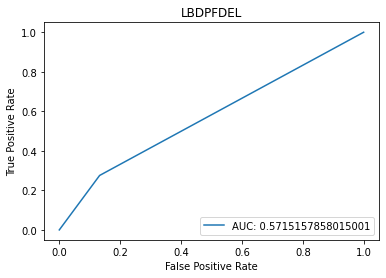

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.017981  0.054094  0.012520  0.000000  0.000000  0.077224  0.006928   
1  0.031812  0.057050  0.020867  0.000000  0.008219  0.120235  0.000000   
2  0.023513  0.068283  0.000000  0.000000  0.000000  0.061584  0.010624   
3  0.017981  0.222584  0.000000  0.113043  0.178082  0.051808  0.000000   
4  0.004149  0.033402  0.000000  0.000000  0.000000  0.032258  0.000000   

    LBXPFDO  
0  0.000000  
1  0.063014  
2  0.000000  
3  0.041096  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       0.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_42a_255 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_42a_255)

1.5209018161994485


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_42a_255 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_42a_255)

1.2332484811259443


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm42_255 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm42_255.columns:
  geomean = stats.gmean(cont_pred_gm42_255.dropna()[col])
  for row in range(len(cont_pred_gm42_255)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm42_255[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm42_255.isna().sum().sum()

0

In [ ]:
cont_pred_gm42_255.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.200000,1.444278,0.102779,0.071367,0.070000,0.686018,0.100000,0.070000
73571.0,0.300000,2.000000,0.200000,0.070000,0.075097,1.300000,0.070000,0.082273
73574.0,0.212098,1.444278,0.070000,0.070000,0.070000,0.700000,0.120432,0.070000
73576.0,0.200000,7.600000,0.070000,0.071367,0.200000,0.600000,0.070000,0.100000
73577.0,0.100000,1.200000,0.070000,0.070000,0.075097,0.400000,0.070000,0.070000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_42a_255 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42_255['LBXPFDE']) 
print(mse_gm_42a_255)

1.3725296307502577


In [ ]:
# setting squared=False gives RMSE

rmse_gm_42a_255 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42_255['LBXPFDE'], squared=False)
print(rmse_gm_42a_255)

1.1715500974137887


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


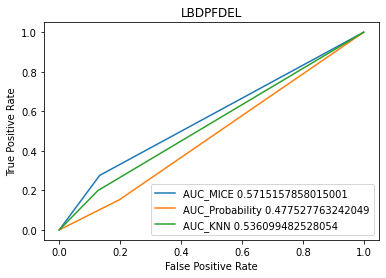

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_42a_255, tpr_MICE_42a_255, threshold_MICE_42a_255 = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_42a_255 = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_42a_255, tpr_prob_42a_255, threshold_prob_42a_255 = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_42a_255 = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_42a_255, tpr_KNN_42a_255, threshold_KNN_42a_255 = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_42a_255 = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_42a_255, tpr_MICE_42a_255, label='AUC_MICE '+str(auc_MICE_42a_255))
plt.plot(fpr_prob_42a_255, tpr_prob_42a_255, label='AUC_Probability '+str(auc_prob_42a_255))
plt.plot(fpr_KNN_42a_255, tpr_KNN_42a_255, label='AUC_KNN '+str(auc_KNN_42a_255))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_42a_255 = []
cont_data_KNN_42a_255 = []
cont_data_true_42a_255 = []
cont_data_gm_42a_255 = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_42a_255.append(cont_pred.iloc[row][col])
    cont_data_KNN_42a_255.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_42a_255.append(cont_data.iloc[row][col])
    cont_data_gm_42a_255.append(cont_pred_gm42.iloc[row][col])

# ------ 30% Missing, all columns -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.3*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,NaN,NaN,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,NaN
73574.0,NaN,NaN,NaN,0.07,0.07,NaN,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,NaN,NaN
73577.0,0.1,1.2,0.07,NaN,NaN,NaN,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=15, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        3.         0.2        ... 0.5        0.1        0.07      ]
 [0.3        2.         0.2        ... 1.3        0.07       0.06530556]
 [0.14225758 1.92145999 0.1857594  ... 0.68108633 0.07       0.07      ]
 ...
 [0.77113484 1.1        0.07       ... 1.5        0.5        0.3       ]
 [0.2        1.4        0.07       ... 0.8        0.07       0.07367938]
 [0.07       1.62545664 0.18118118 ... 0.3        0.07       0.07      ]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA  LBXPFUA  \
0     0.200000  3.000000  0.200000  0.070546  0.078597  0.500000     0.10   
1     0.300000  2.000000  0.200000  0.070000  0.070000  1.300000     0.07   
2     0.142258  1.921460  0.185759  0.070000  0.070000  0.681086     0.07   
3     0.200000  7.600000  0.070000  0.070000  0.200000  0.600000     0.00   
4     0.100000  1.200000  0.070000  0.070532  0.080391  0.619118     0.07   
...        ...       ...       ...       ...       ...       ...      ...   
2163  0.070000  0

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN
73574.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN
73577.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_30a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_30a)

1.3937755088788906


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.200000,3.00000,0.200000,0.070546,0.078597,0.500000,0.10,0.070000
1,0.300000,2.00000,0.200000,0.070000,0.070000,1.300000,0.07,0.065306
2,0.142258,1.92146,0.185759,0.070000,0.070000,0.681086,0.07,0.070000
3,0.200000,7.60000,0.070000,0.070000,0.200000,0.600000,0.00,0.058738
4,0.100000,1.20000,0.070000,0.070532,0.080391,0.619118,0.07,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_30a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_30a)

1.1805826988732686


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

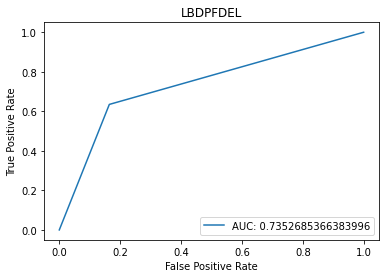

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.086610  0.020867      0.0  0.000000  0.026494  0.000684   
1  0.004490  0.057050  0.020867      0.0  0.000000  0.075786  0.000000   
2  0.001405  0.049956  0.002889      0.0  0.000000  0.024030  0.000000   
3  0.002538  0.222584  0.000000      0.0  0.105691  0.032656  0.001186   
4  0.000586  0.033402  0.000000      0.0  0.053659  0.033888  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.003807  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       1.0       0.0       0.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_30a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_30a)

1.5109639842493297


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_30a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_30a)

1.229212749791235


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm30 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm30.columns:
  geomean = stats.gmean(cont_pred_gm30.dropna()[col])
  for row in range(len(cont_pred_gm30)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm30[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm30.isna().sum().sum()

0

In [ ]:
cont_pred_gm30.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.200000,3.000000,0.200000,0.070548,0.076666,0.500000,0.100000,0.070000
73571.0,0.300000,2.000000,0.200000,0.070000,0.070000,1.300000,0.070000,0.083584
73574.0,0.184339,1.155992,0.119426,0.070000,0.070000,0.653434,0.070000,0.070000
73576.0,0.200000,7.600000,0.070000,0.070000,0.200000,0.600000,0.117221,0.083584
73577.0,0.100000,1.200000,0.070000,0.070548,0.076666,0.653434,0.070000,0.070000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_30a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_30a)

0.08740431035274981


In [ ]:
# setting squared=False gives RMSE

rmse_gm_30a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_30a)

0.2956421998848436


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


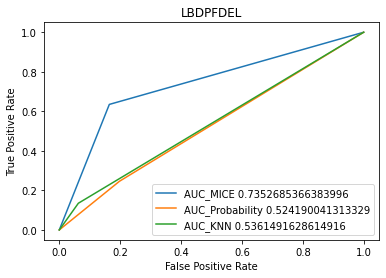

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_30a, tpr_MICE_30a, threshold_MICE_30a = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_30a = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_30a, tpr_prob_30a, threshold_prob_30a = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_30a = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_30a, tpr_KNN_30a, threshold_KNN_30a = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_30a = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_30a, tpr_MICE_30a, label='AUC_MICE '+str(auc_MICE_30a))
plt.plot(fpr_prob_30a, tpr_prob_30a, label='AUC_Probability '+str(auc_prob_30a))
plt.plot(fpr_KNN_30a, tpr_KNN_30a, label='AUC_KNN '+str(auc_KNN_30a))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_30a = []
cont_data_KNN_30a = []
cont_data_true_30a = []
cont_data_gm_30a = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_30a.append(cont_pred.iloc[row][col])
    cont_data_KNN_30a.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_30a.append(cont_data.iloc[row][col])
    cont_data_gm_30a.append(cont_pred_gm30.iloc[row][col])

# ------ 20% Missing, all columns -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.2*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,NaN,NaN,0.07,NaN,0.5,0.10,NaN
73571.0,0.3,2.0,0.20,NaN,0.07,1.3,0.07,NaN
73574.0,0.1,0.2,NaN,0.07,0.07,NaN,NaN,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,NaN,0.10
73577.0,0.1,NaN,NaN,0.07,NaN,0.4,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=15, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        1.68233897 0.17821317 ... 0.5        0.1        0.09079988]
 [0.3        2.         0.2        ... 1.3        0.07       0.09039241]
 [0.1        0.2        0.15913168 ... 0.65278734 0.         0.07      ]
 ...
 [0.9        1.1        0.07       ... 1.5        0.5        0.3       ]
 [0.2        1.4        0.07       ... 0.8        0.07692301 0.08633276]
 [0.07       1.7        0.07       ... 0.3        0.07       0.0774824 ]]
      LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0        0.20  1.682339  0.178213  0.070000  0.074681  0.500000  0.100000   
1        0.30  2.000000  0.200000  0.069367  0.070000  1.300000  0.070000   
2        0.10  0.200000  0.159132  0.070000  0.070000  0.652787  0.000000   
3        0.20  7.600000  0.070000  0.070000  0.200000  0.600000  0.394275   
4        0.10  1.662055  0.177233  0.070000  0.073263  0.400000  0.070000   
...       ...       ...       ...       ...       ...       ...       ...   
2163     0.07  0.

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,NaN,NaN,1.0,NaN,0.0,0.0,NaN
73571.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,NaN
73574.0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0
73577.0,0.0,NaN,NaN,1.0,NaN,0.0,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
73577.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_20a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_20a)

0.03058778919096218


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.2,1.682339,0.178213,0.070000,0.074681,0.500000,0.100000,0.090800
1,0.3,2.000000,0.200000,0.069367,0.070000,1.300000,0.070000,0.090392
2,0.1,0.200000,0.159132,0.070000,0.070000,0.652787,0.000000,0.070000
3,0.2,7.600000,0.070000,0.070000,0.200000,0.600000,0.394275,0.100000
4,0.1,1.662055,0.177233,0.070000,0.073263,0.400000,0.070000,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_20a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_20a)

0.17489365108820326


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

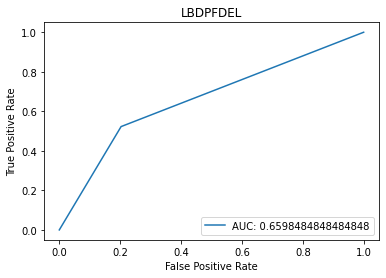

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.051138  0.034029      0.0  0.026016  0.026494  0.000684   
1  0.004490  0.057050  0.020867      0.0  0.000000  0.075786  0.000000   
2  0.000586  0.003843  0.068058      0.0  0.000000  0.043746  0.002418   
3  0.002538  0.222584  0.000000      0.0  0.105691  0.032656  0.000137   
4  0.000586  0.039314  0.019904      0.0  0.000000  0.020333  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000878  
2  0.000000  
3  0.004392  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       1.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       0.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_20a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_20a)

1.5094282909303844


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_20a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_20a)

1.2285879256001113


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm20 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm20.columns:
  geomean = stats.gmean(cont_pred_gm20.dropna()[col])
  for row in range(len(cont_pred_gm20)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm20[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm20.isna().sum().sum()

0

In [ ]:
cont_pred_gm20.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,1.293134,0.117696,0.070000,0.076684,0.50000,0.100000,0.082792
73571.0,0.3,2.000000,0.200000,0.070447,0.070000,1.30000,0.070000,0.082792
73574.0,0.1,0.200000,0.117696,0.070000,0.070000,0.66333,0.117714,0.070000
73576.0,0.2,7.600000,0.070000,0.070000,0.200000,0.60000,0.117714,0.100000
73577.0,0.1,1.293134,0.117696,0.070000,0.076684,0.40000,0.070000,0.070000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_20a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_20a)

0.08740431035274981


In [ ]:
# setting squared=False gives RMSE

rmse_gm_20a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_20a)

0.2956421998848436


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
73577.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


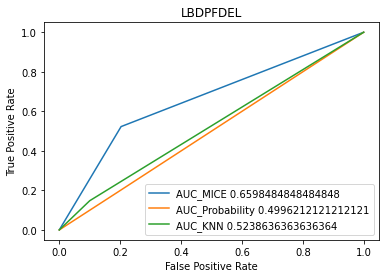

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_20a, tpr_MICE_20a, threshold_MICE_20a = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_20a = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_20a, tpr_prob_20a, threshold_prob_20a = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_20a = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_20a, tpr_KNN_20a, threshold_KNN_20a = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_20a = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_20a, tpr_MICE_20a, label='AUC_MICE '+str(auc_MICE_20a))
plt.plot(fpr_prob_20a, tpr_prob_20a, label='AUC_Probability '+str(auc_prob_20a))
plt.plot(fpr_KNN_20a, tpr_KNN_20a, label='AUC_KNN '+str(auc_KNN_20a))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_20a = []
cont_data_KNN_20a = []
cont_data_true_20a = []
cont_data_gm_20a = []

for i in missing_list:
  row = i[0]
  col = i[1]
  if col == 'LBXPFDE':
    cont_data_MICE_20a.append(cont_pred.iloc[row][col])
    cont_data_KNN_20a.append(cont_pred_KNN.iloc[row][col])
    cont_data_true_20a.append(cont_data.iloc[row][col])
    cont_data_gm_20a.append(cont_pred_gm20.iloc[row][col])

# ------ 10% Missing, all columns -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [621]:
cont_missing = cont_data.copy()
cont_missing = np.log(cont_missing)
bin_missing = bin_data.copy()

In [622]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.1*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [623]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [624]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [625]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
73571.0,-1.203973,NaN,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
73574.0,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
73576.0,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
73577.0,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260


##Multiple Imputation

continuous

In [626]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=15, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[-1.60943791  1.09861229 -1.60943791 ... -0.69314718 -2.30258509
  -2.65926004]
 [-1.2039728   0.75956542 -1.60943791 ...  0.26236426 -2.65926004
  -2.65926004]
 [-2.30258509 -1.60943791 -2.65926004 ... -0.35667494 -2.65926004
  -2.65926004]
 ...
 [-0.10536052  0.09531018 -2.65926004 ...  0.40546511 -0.69314718
  -1.2039728 ]
 [-1.60943791  0.33647224 -2.65926004 ... -0.22314355 -2.65926004
  -2.65926004]
 [-2.65926004  0.53062825 -2.65926004 ... -1.2039728   0.
  -2.65926004]]
       LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0    -1.609438  1.098612 -1.609438 -2.65926 -2.659260 -0.693147 -2.302585   
1    -1.203973  0.759565 -1.609438 -2.65926 -2.659260  0.262364 -2.659260   
2    -2.302585 -1.609438 -2.659260 -2.65926 -2.659260 -0.356675 -2.659260   
3    -1.609438  2.028148 -2.659260 -2.65926 -1.609438 -0.510826 -2.659260   
4    -2.302585  0.182322 -2.659260 -2.65926 -2.659260 -0.916291 -2.659260   
...        ...       ...       ...      ...       ... 

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [627]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < np.log(0.1):
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [628]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [629]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [630]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_10a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_10a)

4.909852031390785


In [631]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [632]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
1,-1.203973,0.759565,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
2,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
3,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
4,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260


In [633]:
# setting squared=False gives RMSE

rmse_10a = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_10a)

2.215818591715212


### binary - ROC curve

In [634]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

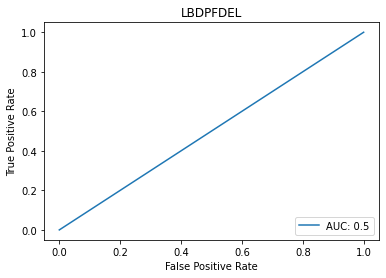

In [635]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [636]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.196086  0.607807  0.233304      0.0  0.000000  0.393900  0.050894   
1  0.271819  0.434269  0.233304      0.0  0.000000  0.585331  0.000000   
2  0.066620  0.169801  0.000000      0.0  0.000000  0.461310  0.000000   
3  0.196086  0.758152  0.000000      0.0  0.359328  0.430427  0.000000   
4  0.066620  0.459604  0.000000      0.0  0.000000  0.349194  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.077694  
4  0.000000  


binary

In [637]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [638]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_10a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_10a)

1.4035370846560193


In [639]:
# setting squared=False gives RMSE

rmse_KNN_10a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_10a)

1.1847097048036785


### binary - ROC curve

In [640]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [641]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm10 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm10.columns:
  geomean = stats.gmean(cont_pred_gm10.dropna()[col])
  for row in range(len(cont_pred_gm10)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm10[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [642]:
cont_pred_gm10.isna().sum().sum()

1734

In [643]:
cont_pred_gm10.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
73571.0,-1.203973,NaN,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
73574.0,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
73576.0,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
73577.0,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260


In [644]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_10a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_10a)

0.0919030655758559


In [645]:
# setting squared=False gives RMSE

rmse_gm_10a = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_10a)

0.30315518398314734


### binary - probability of occurence of '1' or '0'

In [646]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [647]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [648]:
bin_pred_proba.isna().sum().sum()

0

In [649]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


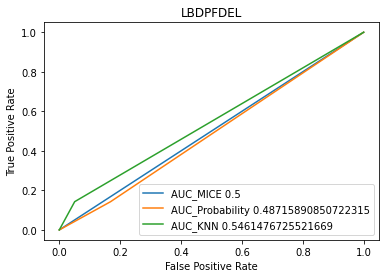

In [650]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_10a, tpr_MICE_10a, threshold_MICE_10a = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_10a = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_10a, tpr_prob_10a, threshold_prob_10a = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_10a = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_10a, tpr_KNN_10a, threshold_KNN_10a = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_10a = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_10a, tpr_MICE_10a, label='AUC_MICE '+str(auc_MICE_10a))
plt.plot(fpr_prob_10a, tpr_prob_10a, label='AUC_Probability '+str(auc_prob_10a))
plt.plot(fpr_KNN_10a, tpr_KNN_10a, label='AUC_KNN '+str(auc_KNN_10a))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [651]:
cont_data_MICE_10a = []
cont_data_KNN_10a = []
cont_data_true_10a = []
cont_data_gm_10a = []

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  if cont_col == 'LBXPFDE':
    cont_data_MICE_10a.append(cont_pred.iloc[row][cont_col])
    cont_data_KNN_10a.append(cont_pred_KNN.iloc[row][cont_col])
    cont_data_true_10a.append(cont_data.iloc[row][cont_col])
    cont_data_gm_10a.append(cont_pred_gm10.iloc[row][cont_col])
  

# ------ 10% Missing, Lasso -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.1*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,NaN,NaN,0.07,NaN,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(estimator=Lasso(),
    max_iter=15, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        3.         0.2        ... 0.5        0.1        0.07      ]
 [0.3        2.         0.2        ... 1.3        0.07       0.07      ]
 [0.1        1.92239472 0.18476607 ... 0.7        0.07       0.07      ]
 ...
 [0.9        1.1        0.07       ... 1.5        0.24011717 0.3       ]
 [0.2        1.4        0.07       ... 0.8        0.07       0.07      ]
 [0.07       1.92239472 0.18476607 ... 0.3        0.07       0.07      ]]
      LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP  LBXPFNA   LBXPFUA  \
0        0.20  3.000000  0.200000  0.070000  0.070000      0.5  0.100000   
1        0.30  2.000000  0.200000  0.070000  0.070000      1.3  0.070000   
2        0.10  1.922395  0.184766  0.070000  0.082344      0.7  0.070000   
3        0.20  7.600000  0.070000  0.070000  0.200000      0.6  0.070000   
4        0.10  1.200000  0.070000  0.070000  0.070000      0.4  0.070000   
...       ...       ...       ...       ...       ...      ...       ...   
2163     0.07  0.600000 

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,NaN,NaN,1.0,NaN,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_10a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_10a_lasso)

1.2387796130664546


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.2,3.000000,0.200000,0.07,0.070000,0.5,0.10,0.07
1,0.3,2.000000,0.200000,0.07,0.070000,1.3,0.07,0.07
2,0.1,1.922395,0.184766,0.07,0.082344,0.7,0.07,0.07
3,0.2,7.600000,0.070000,0.07,0.200000,0.6,0.07,0.10
4,0.1,1.200000,0.070000,0.07,0.070000,0.4,0.07,0.07


In [ ]:
# setting squared=False gives RMSE

rmse_10a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_10a_lasso)

1.1130047677644757


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

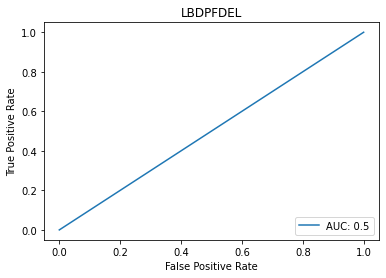

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.008826  0.086610  0.020867      0.0  0.000000  0.026494  0.000388   
1  0.015614  0.057050  0.020867      0.0  0.000000  0.075786  0.000000   
2  0.002037  0.037541  0.022151      0.0  0.000000  0.038817  0.000000   
3  0.008826  0.222584  0.000000      0.0  0.105691  0.032656  0.000000   
4  0.002037  0.033402  0.000000      0.0  0.000000  0.020333  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.004392  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_10a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_10a_lasso)

1.5273274630735336


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_10a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_10a_lasso)

1.2358509064905578


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm10 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm10.columns:
  geomean = stats.gmean(cont_pred_gm10.dropna()[col])
  for row in range(len(cont_pred_gm10)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm10[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm10.isna().sum().sum()

0

In [ ]:
cont_pred_gm10.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.000000,0.200000,0.07,0.070000,0.5,0.10,0.07
73571.0,0.3,2.000000,0.200000,0.07,0.070000,1.3,0.07,0.07
73574.0,0.1,1.234688,0.118393,0.07,0.077205,0.7,0.07,0.07
73576.0,0.2,7.600000,0.070000,0.07,0.200000,0.6,0.07,0.10
73577.0,0.1,1.200000,0.070000,0.07,0.070000,0.4,0.07,0.07


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_10a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm10['LBXPFDE']) 
print(mse_gm_10a_lasso)

1.2448604978704203


In [ ]:
# setting squared=False gives RMSE

rmse_gm_10a_lasso = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm10['LBXPFDE'], squared=False)
print(rmse_gm_10a_lasso)

1.1157331660708218


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


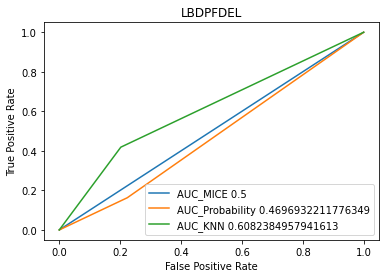

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_10a_lasso, tpr_MICE_10a_lasso, threshold_MICE_10a_lasso = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_10a_lasso = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_10a_lasso, tpr_prob_10a_lasso, threshold_prob_10a_lasso = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_10a_lasso = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_10a_lasso, tpr_KNN_10a_lasso, threshold_KNN_10a_lasso = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_10a_lasso = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_10a_lasso, tpr_MICE_10a_lasso, label='AUC_MICE '+str(auc_MICE_10a_lasso))
plt.plot(fpr_prob_10a_lasso, tpr_prob_10a_lasso, label='AUC_Probability '+str(auc_prob_10a_lasso))
plt.plot(fpr_KNN_10a_lasso, tpr_KNN_10a_lasso, label='AUC_KNN '+str(auc_KNN_10a_lasso))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_10a_lasso = []
cont_data_KNN_10a_lasso = []
cont_data_true_10a_lasso = []
cont_data_gm_10a_lasso = []

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  if cont_col == 'LBXPFDE':
    cont_data_MICE_10a_lasso.append(cont_pred.iloc[row][cont_col])
    cont_data_KNN_10a_lasso.append(cont_pred_KNN.iloc[row][cont_col])
    cont_data_true_10a_lasso.append(cont_data.iloc[row][cont_col])
    cont_data_gm_10a_lasso.append(cont_pred_gm10.iloc[row][cont_col])
  

# ------ 10% Missing, LinearRegression -------- 

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
copy = cont_data.copy()
copy = np.log(copy)
display(copy)

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
73571.0,-1.203973,0.693147,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
73574.0,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
73576.0,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
73577.0,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260
...,...,...,...,...,...,...,...,...
83711.0,-2.659260,-0.510826,-1.609438,-2.65926,-2.659260,-1.203973,-2.659260,-2.659260
83712.0,-1.609438,1.163151,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260
83713.0,-0.105361,0.095310,-2.659260,-2.65926,-2.659260,0.405465,-0.693147,-1.203973


In [ ]:
cont_missing = cont_data.copy()
cont_missing = np.log(cont_missing)

bin_missing = bin_data.copy()

In [ ]:
display(cont_missing)

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
73571.0,-1.203973,0.693147,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
73574.0,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
73576.0,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
73577.0,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260
...,...,...,...,...,...,...,...,...
83711.0,-2.659260,-0.510826,-1.609438,-2.65926,-2.659260,-1.203973,-2.659260,-2.659260
83712.0,-1.609438,1.163151,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260
83713.0,-0.105361,0.095310,-2.659260,-2.65926,-2.659260,0.405465,-0.693147,-1.203973


In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.1*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,-1.609438,NaN,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,NaN
73571.0,-1.203973,0.693147,-1.609438,-2.65926,NaN,NaN,-2.659260,-2.659260
73574.0,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
73576.0,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
73577.0,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(estimator=LinearRegression(),
    max_iter=15, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[-1.60943791  0.         -1.60943791 ... -0.69314718 -2.30258509
   0.        ]
 [-1.2039728   0.69314718 -1.60943791 ...  0.         -2.65926004
  -2.65926004]
 [-2.30258509 -1.60943791 -2.65926004 ... -0.35667494 -2.65926004
  -2.65926004]
 ...
 [-0.10536052  0.09531018  0.         ...  0.40546511 -0.69314718
  -1.2039728 ]
 [-1.60943791  0.33647224 -2.65926004 ... -0.22314355 -2.65926004
  -2.65926004]
 [-2.65926004  0.53062825 -2.65926004 ... -1.2039728   0.
  -2.65926004]]
       LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0    -1.609438  0.000000 -1.609438 -2.65926 -2.659260 -0.693147 -2.302585   
1    -1.203973  0.693147 -1.609438 -2.65926  0.000000  0.000000 -2.659260   
2    -2.302585 -1.609438 -2.659260 -2.65926 -2.659260 -0.356675 -2.659260   
3    -1.609438  2.028148 -2.659260 -2.65926 -1.609438 -0.510826 -2.659260   
4    -2.302585  0.182322 -2.659260 -2.65926 -2.659260 -0.916291 -2.659260   
...        ...       ...       ...      ...       ... 

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < np.log(0.1):
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN
73571.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
73571.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_10a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_10a_linreg)

5.2430507713223715


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
1,-1.203973,0.693147,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
2,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
3,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
4,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260


In [ ]:
# setting squared=False gives RMSE

rmse_10a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_10a_linreg)

2.2897708993090053


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

In [ ]:
bin_data_ROC

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

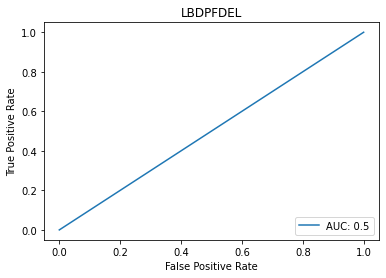

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=5)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.159137  0.607807  0.233304      0.0  0.000000  0.360727  0.059919   
1  0.220600  0.542226  0.233304      0.0  0.000000  0.536036  0.000000   
2  0.054067  0.392052  0.000000      0.0  0.000000  0.422460  0.000000   
3  0.159137  0.758152  0.000000      0.0  0.359328  0.394177  0.000000   
4  0.054067  0.459604  0.000000      0.0  0.000000  0.319786  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.146411  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=5)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_10a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_10a_linreg)

1.3858521308392133


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_10a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_10a_linreg)

1.1772222096270581


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm10 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm10.columns:
  geomean = stats.gmean(cont_pred_gm10.dropna()[col])
  for row in range(len(cont_pred_gm10)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm10[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [ ]:
cont_pred_gm10.isna().sum().sum()

1734

In [ ]:
cont_pred_gm10.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,-1.609438,NaN,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,NaN
73571.0,-1.203973,0.693147,-1.609438,-2.65926,NaN,NaN,-2.659260,-2.659260
73574.0,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
73576.0,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
73577.0,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_10a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm10['LBXPFDE']) 
print(mse_gm_10a_linreg)

ValueError: ignored

In [ ]:
# setting squared=False gives RMSE

rmse_gm_10a_linreg = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm10['LBXPFDE'], squared=False)
print(rmse_gm_10a_linreg)

### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
print(bin_data_ROC, bin_pred_ROC, sep='\n')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

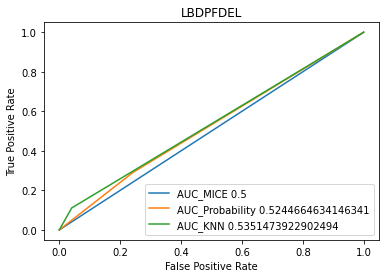

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_10a_linreg, tpr_MICE_10a_linreg, threshold_MICE_10a_linreg = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_10a_linreg = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_10a_linreg, tpr_prob_10a_linreg, threshold_prob_10a_linreg = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_10a_linreg = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

#fpr_KNN_10a_linreg, tpr_KNN_10a_linreg, threshold_KNN_10a_linreg = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
#auc_KNN_10a_linreg = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_10a_linreg, tpr_MICE_10a_linreg, label='AUC_MICE '+str(auc_MICE_10a_linreg))
plt.plot(fpr_prob_10a_linreg, tpr_prob_10a_linreg, label='AUC_Probability '+str(auc_prob_10a_linreg))
plt.plot(fpr_KNN_10a_linreg, tpr_KNN_10a_linreg, label='AUC_KNN '+str(auc_KNN_10a_linreg))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_10a_linreg = []
cont_data_KNN_10a_linreg = []
cont_data_true_10a_linreg = []
cont_data_gm_10a_linreg = []

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  if cont_col == 'LBXPFDE':
    cont_data_MICE_10a_linreg.append(cont_pred.iloc[row][cont_col])
    cont_data_KNN_10a_linreg.append(cont_pred_KNN.iloc[row][cont_col])
    cont_data_true_10a_linreg.append(cont_data.iloc[row][cont_col])
    cont_data_gm_10a_linreg.append(cont_pred_gm10.iloc[row][cont_col])
  

# ------ 10% Missing, all columns -------- 
## 10 iterations
## 3 neighbors

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.1*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,NaN,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=10, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        3.         0.2        ... 0.90422259 0.1        0.07      ]
 [0.3        2.         0.2        ... 1.3        0.07       0.07      ]
 [0.1        0.2        0.07       ... 0.7        0.07       0.07      ]
 ...
 [0.9        1.1        0.07       ... 1.5        0.5        0.3       ]
 [0.2        1.4        0.07       ... 0.8        0.07       0.07      ]
 [0.02767342 1.7        0.07       ... 0.3        0.07       0.07      ]]
       LBXPFDE  LBXPFHS  LBXMPAH  LBXPFBS  LBXPFHP   LBXPFNA  LBXPFUA  LBXPFDO
0     0.200000      3.0     0.20     0.07     0.07  0.904223     0.10     0.07
1     0.300000      2.0     0.20     0.07     0.07  1.300000     0.07     0.07
2     0.100000      0.2     0.07     0.07     0.07  0.700000     0.07     0.07
3     0.200000      7.6     0.07     0.07     0.20  0.600000     0.07     0.10
4     0.100000      1.2     0.07     0.07     0.07  0.400000     0.07     0.07
...        ...      ...      ...      ...      ...       ...      ...      ...
216

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_10a_103 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_10a_103)

0.013280013895896604


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.2,3.0,0.20,0.07,0.07,0.904223,0.10,0.07
1,0.3,2.0,0.20,0.07,0.07,1.300000,0.07,0.07
2,0.1,0.2,0.07,0.07,0.07,0.700000,0.07,0.07
3,0.2,7.6,0.07,0.07,0.20,0.600000,0.07,0.10
4,0.1,1.2,0.07,0.07,0.07,0.400000,0.07,0.07


In [ ]:
# setting squared=False gives RMSE

rmse_10a_103 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_10a_103)

0.11523894261878927


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

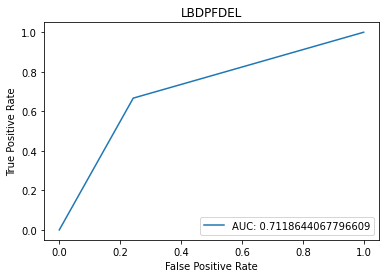

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=3)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.105662  0.020867      0.0  0.000000  0.026494  0.000684   
1  0.004490  0.069600  0.020867      0.0  0.000000  0.075786  0.000000   
2  0.000586  0.004688  0.000000      0.0  0.000000  0.038817  0.000000   
3  0.002538  0.271547  0.000000      0.0  0.178082  0.032656  0.000000   
4  0.000586  0.040750  0.000000      0.0  0.000000  0.020333  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.004392  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=3)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_10a_103 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_10a_103)

1.5084392312912276


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_10a_103 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_10a_103)

1.2281853407736258


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm10_103 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm10_103.columns:
  geomean = stats.gmean(cont_pred_gm10_103.dropna()[col])
  for row in range(len(cont_pred_gm10_103)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm10_103[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm10_103.isna().sum().sum()

0

In [ ]:
cont_pred_gm10_103.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.666607,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.300000,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.700000,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.600000,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.400000,0.07,0.07


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_10a_103 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_10a_103)

0.17062648993949459


In [ ]:
# setting squared=False gives RMSE

rmse_gm_10a_103 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_10a_103)

0.4130695945473288


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


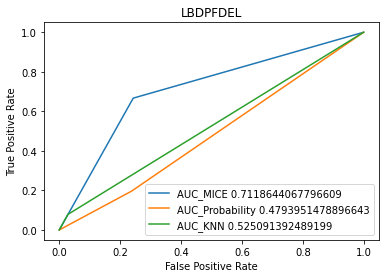

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_10a_103, tpr_MICE_10a_103, threshold_MICE_10a_103 = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_10a_103 = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_10a_103, tpr_prob_10a_103, threshold_prob_10a_103 = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_10a_103 = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_10a_103, tpr_KNN_10a_103, threshold_KNN_10a_103 = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_10a_103 = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_10a_103, tpr_MICE_10a_103, label='AUC_MICE '+str(auc_MICE_10a_103))
plt.plot(fpr_prob_10a_103, tpr_prob_10a_103, label='AUC_Probability '+str(auc_prob_10a_103))
plt.plot(fpr_KNN_10a_103, tpr_KNN_10a_103, label='AUC_KNN '+str(auc_KNN_10a_103))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_10a_103 = []
cont_data_KNN_10a_103 = []
cont_data_true_10a_103 = []
cont_data_gm_10a_103 = []

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  if cont_col == 'LBXPFDE':
    cont_data_MICE_10a_103.append(cont_pred.iloc[row][cont_col])
    cont_data_KNN_10a_103.append(cont_pred_KNN.iloc[row][cont_col])
    cont_data_true_10a_103.append(cont_data.iloc[row][cont_col])
    cont_data_gm_10a_103.append(cont_pred_gm10.iloc[row][cont_col])
  

# ------ 10% Missing, all columns -------- 
## 30 iterations
## 3 neighbors

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.1*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,NaN,NaN,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,NaN,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,NaN
73577.0,0.1,1.2,0.07,NaN,0.07,0.4,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=30, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        3.         0.2        ... 0.5        0.1        0.07      ]
 [0.3        2.         0.2        ... 1.3        0.07       0.07      ]
 [0.1        1.76621556 0.07       ... 0.7        0.07       0.07      ]
 ...
 [0.9        1.1        0.07       ... 1.5        0.5        0.3       ]
 [0.12566857 1.4        0.07       ... 0.8        0.07       0.07      ]
 [0.07       1.7        0.17935074 ... 0.3        0.07       0.07      ]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA  LBXPFUA  \
0     0.200000  3.000000  0.200000  0.070585  0.077983  0.500000     0.10   
1     0.300000  2.000000  0.200000  0.070000  0.070000  1.300000     0.07   
2     0.100000  1.766216  0.070000  0.070000  0.070000  0.700000     0.07   
3     0.200000  7.600000  0.070000  0.070000  0.200000  0.600000     0.07   
4     0.100000  1.200000  0.070000  0.070191  0.070000  0.400000     0.07   
...        ...       ...       ...       ...       ...       ...      ...   
2163  0.070000  0

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN
73577.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_10a_303 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_10a_303)

0.017067409593407874


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.2,3.000000,0.20,0.070585,0.077983,0.5,0.10,0.070000
1,0.3,2.000000,0.20,0.070000,0.070000,1.3,0.07,0.070000
2,0.1,1.766216,0.07,0.070000,0.070000,0.7,0.07,0.070000
3,0.2,7.600000,0.07,0.070000,0.200000,0.6,0.07,0.077955
4,0.1,1.200000,0.07,0.070191,0.070000,0.4,0.07,0.070000


In [ ]:
# setting squared=False gives RMSE

rmse_10a_303 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_10a_303)

0.1306422963416055


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

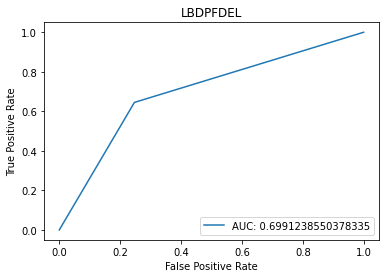

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=3)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.086610  0.020867      0.0  0.000000  0.042033  0.000684   
1  0.004490  0.057050  0.020867      0.0  0.000000  0.120235  0.000000   
2  0.000586  0.093507  0.000000      0.0  0.000000  0.061584  0.000000   
3  0.002538  0.222584  0.000000      0.0  0.105691  0.051808  0.000000   
4  0.000586  0.033402  0.000000      0.0  0.000000  0.032258  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.006345  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=3)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_10a_303 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_10a_303)

1.5086688160888944


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_10a_303 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_10a_303)

1.2282788022631077


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm10_303 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm10_303.columns:
  geomean = stats.gmean(cont_pred_gm10_303.dropna()[col])
  for row in range(len(cont_pred_gm10_303)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm10_303[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm10_303.isna().sum().sum()

0

In [ ]:
cont_pred_gm10_303.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.000000,0.20,0.070473,0.076615,0.5,0.10,0.070000
73571.0,0.3,2.000000,0.20,0.070000,0.070000,1.3,0.07,0.070000
73574.0,0.1,1.285262,0.07,0.070000,0.070000,0.7,0.07,0.070000
73576.0,0.2,7.600000,0.07,0.070000,0.200000,0.6,0.07,0.082489
73577.0,0.1,1.200000,0.07,0.070473,0.070000,0.4,0.07,0.070000


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_10a_303 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE']) 
print(mse_gm_10a_303)

0.17062648993949459


In [ ]:
# setting squared=False gives RMSE

rmse_gm_10a_303 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm42['LBXPFDE'], squared=False)
print(rmse_gm_10a_303)

0.4130695945473288


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


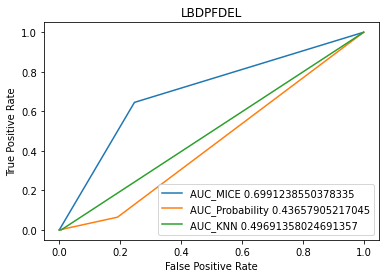

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_10a_303, tpr_MICE_10a_303, threshold_MICE_10a_303 = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_10a_303 = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_10a_303, tpr_prob_10a_303, threshold_prob_10a_303 = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_10a_303 = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_10a_303, tpr_KNN_10a_303, threshold_KNN_10a_303 = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_10a_303 = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_10a_303, tpr_MICE_10a_303, label='AUC_MICE '+str(auc_MICE_10a_303))
plt.plot(fpr_prob_10a_303, tpr_prob_10a_303, label='AUC_Probability '+str(auc_prob_10a_303))
plt.plot(fpr_KNN_10a_303, tpr_KNN_10a_303, label='AUC_KNN '+str(auc_KNN_10a_303))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_10a_303 = []
cont_data_KNN_10a_303 = []
cont_data_true_10a_303 = []
cont_data_gm_10a_303 = []

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  if cont_col == 'LBXPFDE':
    cont_data_MICE_10a_303.append(cont_pred.iloc[row][cont_col])
    cont_data_KNN_10a_303.append(cont_pred_KNN.iloc[row][cont_col])
    cont_data_true_10a_303.append(cont_data.iloc[row][cont_col])
    cont_data_gm_10a_303.append(cont_pred_gm10.iloc[row][cont_col])
  

# ------ 10% Missing, all columns -------- 
## 25 iterations
## 2 neighbors

##Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing

–this will make comparing them for assessment easier

In [ ]:
cont_missing = cont_data.copy()
bin_missing = bin_data.copy()

In [ ]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.1*len(ix)))): 
    missing_df.iat[row, col] = np.nan

In [ ]:
# codes : binary:LBDPFDEL,  continuous:LBXPFDE
add_missing(cont_missing)

In [ ]:
missing_list = []

for col in cont_missing.columns:
  for row in range(len(cont_missing)):
    if np.isnan(cont_missing.iloc[row][col]): # nan entry 
      bin_key = cont_dict[col]                # get corresponding binary code 
      missing_list.append((row, col, bin_key)) # save row index, cont. code (column), bin. code 

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,NaN,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,NaN,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,NaN,0.07,0.07
73576.0,0.2,NaN,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,NaN,0.4,0.07,0.07


##Multiple Imputation

continuous

In [ ]:
cont_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
imp = IterativeImputer(#estimator=LinearRegression(),
    max_iter=25, random_state=0, min_value=0)   
cont_imputed = imp.fit_transform(cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[0.2        3.         0.2        ... 0.5        0.1        0.07      ]
 [0.3        2.         0.2        ... 1.3        0.07       0.07      ]
 [0.1        0.2        0.07       ... 0.57865241 0.07       0.07      ]
 ...
 [0.9        1.1        0.1513084  ... 1.5        0.5        0.3       ]
 [0.2        1.4        0.07       ... 0.8        0.07       0.07      ]
 [0.07       1.7        0.07       ... 0.3        0.07       0.07      ]]
       LBXPFDE   LBXPFHS   LBXMPAH   LBXPFBS   LBXPFHP   LBXPFNA  LBXPFUA  \
0     0.200000  3.000000  0.200000  0.070306  0.070000  0.500000     0.10   
1     0.300000  2.000000  0.200000  0.070000  0.089145  1.300000     0.07   
2     0.100000  0.200000  0.070000  0.070000  0.070000  0.578652     0.07   
3     0.200000  1.615334  0.070000  0.070000  0.200000  0.600000     0.07   
4     0.100000  1.200000  0.070000  0.070000  0.074283  0.400000     0.07   
...        ...       ...       ...       ...       ...       ...      ...   
2163  0.013439  0

### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [ ]:
bin_pred = bin_data.copy()
bin_missing = bin_data.copy()

# missing_list[x][0] - row index of xth item in list
# missing_list[x][1] - continuous column of x'th item 
# missing_list[x][2] - binary code corresp. to continuous column

# detect limit for all PFAS is 0.1 

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  bin_col = i[2]
  bin_missing[bin_col][row] = np.nan
  if cont_pred.iloc[row][cont_col] < 0.1:
    imputed_entry = 1
  else:
    imputed_entry = 0
  bin_pred[bin_col][row] = imputed_entry 
  bin_missing[bin_col][row] = np.nan

In [ ]:
bin_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0
73576.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,1.0


In [ ]:
bin_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


##assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_10a_252 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE']) 
print(mse_10a_252)

0.012063959189578151


In [ ]:
cont_data.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.0,0.20,0.07,0.07,0.5,0.10,0.07
73571.0,0.3,2.0,0.20,0.07,0.07,1.3,0.07,0.07
73574.0,0.1,0.2,0.07,0.07,0.07,0.7,0.07,0.07
73576.0,0.2,7.6,0.07,0.07,0.20,0.6,0.07,0.10
73577.0,0.1,1.2,0.07,0.07,0.07,0.4,0.07,0.07


In [ ]:
cont_pred.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,0.2,3.000000,0.20,0.070306,0.070000,0.500000,0.10,0.07
1,0.3,2.000000,0.20,0.070000,0.089145,1.300000,0.07,0.07
2,0.1,0.200000,0.07,0.070000,0.070000,0.578652,0.07,0.07
3,0.2,1.615334,0.07,0.070000,0.200000,0.600000,0.07,0.10
4,0.1,1.200000,0.07,0.070000,0.074283,0.400000,0.07,0.07


In [ ]:
# setting squared=False gives RMSE

rmse_10a_252 = mean_squared_error(cont_data['LBXPFDE'], cont_pred['LBXPFDE'], squared=False)
print(rmse_10a_252)

0.10983605596332267


### binary - ROC curve

In [ ]:
bin_data_ROC = []
bin_pred_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_data_ROC.append(bin_data.iloc[row][bin_col])
    bin_pred_ROC.append(bin_pred.iloc[row][bin_col])

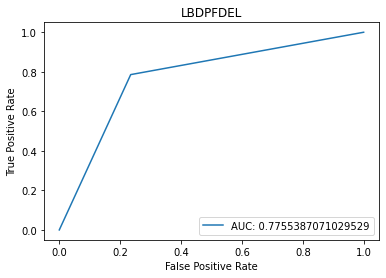

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

# codes : binary:LBDPFDEL,  continuous:LBXPFDE


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(np.array(bin_data_ROC), np.array(bin_pred_ROC))
auc = metrics.roc_auc_score(np.array(bin_data_ROC), np.array(bin_pred_ROC))
plt.plot(fpr, tpr, label='AUC: '+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## KNN Imputation

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#cont_scaled = pd.DataFrame(scaler.fit_transform(cont_data), columns = cont_data.columns)
cont_missing_scaled = pd.DataFrame(scaler.fit_transform(cont_missing), columns = cont_missing.columns)

imputer = KNNImputer(n_neighbors=2)
cont_pred_KNN = pd.DataFrame(imputer.fit_transform(cont_missing_scaled),columns = cont_missing_scaled.columns)

print(cont_pred_KNN.head())

    LBXPFDE   LBXPFHS   LBXMPAH  LBXPFBS   LBXPFHP   LBXPFNA   LBXPFUA  \
0  0.002538  0.105662  0.020867      0.0  0.000000  0.026494  0.000684   
1  0.004490  0.069600  0.020867      0.0  0.000000  0.075786  0.000000   
2  0.000586  0.004688  0.000000      0.0  0.000000  0.029575  0.000000   
3  0.002538  0.038947  0.000000      0.0  0.105691  0.032656  0.000000   
4  0.000586  0.040750  0.000000      0.0  0.000000  0.020333  0.000000   

    LBXPFDO  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.004392  
4  0.000000  


binary

In [ ]:
import numpy as np

# importing the KNN from fancyimpute library
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


imputer = KNNImputer(n_neighbors=2)
bin_pred_KNN = pd.DataFrame(imputer.fit_transform(bin_missing),columns = bin_missing.columns)

bin_pred_KNN = round(bin_pred_KNN)

print(bin_pred_KNN.head())

   LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0       0.0       0.0       0.0       1.0       1.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       1.0       0.0       1.0   
2       0.0       0.0       1.0       1.0       1.0       0.0       1.0   
3       0.0       0.0       1.0       1.0       0.0       0.0       1.0   
4       0.0       0.0       1.0       1.0       1.0       0.0       1.0   

   LBDPFDOL  
0       1.0  
1       1.0  
2       1.0  
3       0.0  
4       1.0  


## KNN assessment

### continuous - RMSE

continuous

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_KNN_10a_252 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE']) 
print(mse_KNN_10a_252)

1.5083082191127115


In [ ]:
# setting squared=False gives RMSE

rmse_KNN_10a_252 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_KNN['LBXPFDE'], squared=False)
print(rmse_KNN_10a_252)

1.2281320039444912


### binary - ROC curve

In [ ]:
bin_pred_KNN_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_KNN_ROC.append(bin_pred_KNN.iloc[row][bin_col])

## comparing with previous imputation method

### continuous - geometric mean

In [ ]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm10_252 = cont_missing.copy()
# continuous : geometric mean
for col in cont_pred_gm10_252.columns:
  geomean = stats.gmean(cont_pred_gm10_252.dropna()[col])
  for row in range(len(cont_pred_gm10_252)):
    if math.isnan(cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm10_252[col].values[row] = geomean # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

In [ ]:
cont_pred_gm10_252.isna().sum().sum()

0

In [ ]:
cont_pred_gm10_252.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
SEQN,,,,,,,,
73568.0,0.2,3.000000,0.20,0.070346,0.070000,0.500000,0.10,0.07
73571.0,0.3,2.000000,0.20,0.070000,0.076408,1.300000,0.07,0.07
73574.0,0.1,0.200000,0.07,0.070000,0.070000,0.678983,0.07,0.07
73576.0,0.2,1.325289,0.07,0.070000,0.200000,0.600000,0.07,0.10
73577.0,0.1,1.200000,0.07,0.070000,0.076408,0.400000,0.07,0.07


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_gm_10a_252 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm10_252['LBXPFDE']) 
print(mse_gm_10a_252)

0.011712080473620656


In [ ]:
# setting squared=False gives RMSE

rmse_gm_10a_252 = mean_squared_error(cont_data['LBXPFDE'], cont_pred_gm10_252['LBXPFDE'], squared=False)
print(rmse_gm_10a_252)

0.10822236586593668


### binary - probability of occurence of '1' or '0'

In [ ]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = bin_missing.copy()

for col in bin_missing.columns:
  for row in range(len(bin_missing)):
    if math.isnan(bin_missing.iloc[row][col]):
      #if len(bin_missing[col].value_counts()) == 1:
      #  val = bin_missing[col].unique()[np.logical_not(np.isnan(bin_missing[col].unique()))][0]
      #  bin_pred_proba[col].values[row] = val
      #else:
      total = bin_missing[col].value_counts()[0]+bin_missing[col].value_counts()[1]
      zero_weight = (bin_missing[col].value_counts()[0] / total)*100
      one_weight = (bin_missing[col].value_counts()[1] / total)*100
      bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [ ]:
# make lists of binary values 
# already have bin_data_ROC and bin_pred_ROC
# need bin_pred_proba_ROC 
bin_pred_proba_ROC = []
for i in missing_list:
  row = i[0]
  bin_col = i[2]
  if bin_col == 'LBDPFDEL':
    bin_pred_proba_ROC.append(bin_pred_proba.iloc[row][bin_col])

In [ ]:
bin_pred_proba.isna().sum().sum()

0

In [ ]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL
SEQN,,,,,,,,
73568.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
73571.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
73574.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
73576.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
73577.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


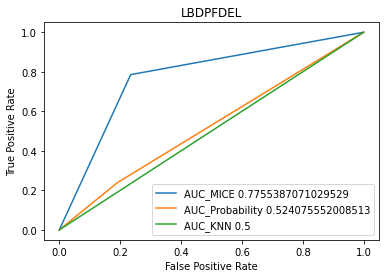

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
fpr_MICE_10a_252, tpr_MICE_10a_252, threshold_MICE_10a_252 = metrics.roc_curve(bin_data_ROC, bin_pred_ROC)
auc_MICE_10a_252 = metrics.roc_auc_score(bin_data_ROC, bin_pred_ROC)
fpr_prob_10a_252, tpr_prob_10a_252, threshold_prob_10a_252 = metrics.roc_curve(bin_data_ROC, bin_pred_proba_ROC)
auc_prob_10a_252 = metrics.roc_auc_score(bin_data_ROC, bin_pred_proba_ROC)

fpr_KNN_10a_252, tpr_KNN_10a_252, threshold_KNN_10a_252 = metrics.roc_curve(bin_data_ROC, bin_pred_KNN_ROC)
auc_KNN_10a_252 = metrics.roc_auc_score(bin_data_ROC, bin_pred_KNN_ROC)

plt.plot(fpr_MICE_10a_252, tpr_MICE_10a_252, label='AUC_MICE '+str(auc_MICE_10a_252))
plt.plot(fpr_prob_10a_252, tpr_prob_10a_252, label='AUC_Probability '+str(auc_prob_10a_252))
plt.plot(fpr_KNN_10a_252, tpr_KNN_10a_252, label='AUC_KNN '+str(auc_KNN_10a_252))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL')
plt.legend(loc=4)
plt.show()

## Saving variables

In [ ]:
cont_data_MICE_10a_252 = []
cont_data_KNN_10a_252 = []
cont_data_true_10a_252 = []
cont_data_gm_10a_252 = []

for i in missing_list:
  row = i[0]
  cont_col = i[1]
  if cont_col == 'LBXPFDE':
    cont_data_MICE_10a_252.append(cont_pred.iloc[row][cont_col])
    cont_data_KNN_10a_252.append(cont_pred_KNN.iloc[row][cont_col])
    cont_data_true_10a_252.append(cont_data.iloc[row][cont_col])
    cont_data_gm_10a_252.append(cont_pred_gm10_252.iloc[row][cont_col])
  

# Comparing Models

In [ ]:
# mse, rmse, average difference 
av_diff_MICE_10a = np.sum(np.abs(np.array([cont_data_true_10a]) - np.array([cont_data_MICE_10a]))) / np.shape(np.array([cont_data_true_10a]) - np.array([cont_data_MICE_10a]))[1]
av_diff_MICE_20a = np.sum(np.abs(np.array([cont_data_true_20a]) - np.array([cont_data_MICE_20a]))) / np.shape(np.array([cont_data_true_20a]) - np.array([cont_data_MICE_20a]))[1]
av_diff_MICE_30a = np.sum(np.abs(np.array([cont_data_true_30a]) - np.array([cont_data_MICE_30a]))) / np.shape(np.array([cont_data_true_30a]) - np.array([cont_data_MICE_30a]))[1]
av_diff_MICE_42a = np.sum(np.abs(np.array([cont_data_true_42a]) - np.array([cont_data_MICE_42a]))) / np.shape(np.array([cont_data_true_42a]) - np.array([cont_data_MICE_42a]))[1]

av_diff_MICE_10a_linreg = np.sum(np.abs(np.array([cont_data_true_10a_linreg]) - np.array([cont_data_MICE_10a_linreg]))) / np.shape(np.array([cont_data_true_10a_linreg]) - np.array([cont_data_MICE_10a_linreg]))[1]
av_diff_MICE_10a_lasso = np.sum(np.abs(np.array([cont_data_true_10a_lasso]) - np.array([cont_data_MICE_10a_lasso]))) / np.shape(np.array([cont_data_true_10a_lasso]) - np.array([cont_data_MICE_10a_lasso]))[1]

av_diff_KNN_10a = np.sum(np.abs(np.array([cont_data_true_10a]) - np.array([cont_data_KNN_10a]))) / np.shape(np.array([cont_data_true_10a]) - np.array([cont_data_KNN_10a]))[1]
av_diff_KNN_20a = np.sum(np.abs(np.array([cont_data_true_20a]) - np.array([cont_data_KNN_20a]))) / np.shape(np.array([cont_data_true_20a]) - np.array([cont_data_KNN_20a]))[1]
av_diff_KNN_30a = np.sum(np.abs(np.array([cont_data_true_30a]) - np.array([cont_data_KNN_30a]))) / np.shape(np.array([cont_data_true_30a]) - np.array([cont_data_KNN_30a]))[1]
av_diff_KNN_42a = np.sum(np.abs(np.array([cont_data_true_42a]) - np.array([cont_data_KNN_42a]))) / np.shape(np.array([cont_data_true_42a]) - np.array([cont_data_KNN_42a]))[1]

av_diff_gm_10a = np.sum(np.abs(np.array([cont_data_true_10a]) - np.array([cont_data_gm_10a]))) / np.shape(np.array([cont_data_true_10a]) - np.array([cont_data_gm_10a]))[1]
av_diff_gm_20a = np.sum(np.abs(np.array([cont_data_true_20a]) - np.array([cont_data_gm_20a]))) / np.shape(np.array([cont_data_true_20a]) - np.array([cont_data_gm_20a]))[1]
av_diff_gm_30a = np.sum(np.abs(np.array([cont_data_true_30a]) - np.array([cont_data_gm_30a]))) / np.shape(np.array([cont_data_true_30a]) - np.array([cont_data_gm_30a]))[1]
av_diff_gm_42a = np.sum(np.abs(np.array([cont_data_true_42a]) - np.array([cont_data_gm_42a]))) / np.shape(np.array([cont_data_true_42a]) - np.array([cont_data_gm_42a]))[1]


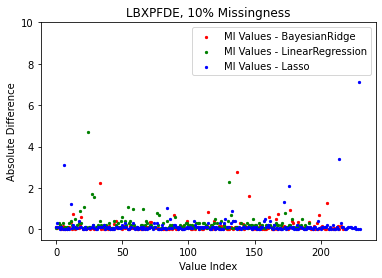

In [ ]:
plt.scatter(range(len(cont_data_true_10a)), np.abs(np.array([cont_data_true_10a]) - np.array([cont_data_MICE_10a])), c='r', s=5, label='MI Values - BayesianRidge')
plt.scatter(range(len(cont_data_true_10a_linreg)), np.abs(np.array([cont_data_true_10a_linreg]) - np.array([cont_data_KNN_10a_linreg])), c='g', s=5, label='MI Values - LinearRegression')
plt.scatter(range(len(cont_data_true_10a_lasso)), np.abs(np.array([cont_data_true_10a_lasso]) - np.array([cont_data_gm_10a_lasso])), c='b', s=5, label='MI Values - Lasso')
plt.ylabel('Absolute Difference')
plt.xlabel('Value Index')
plt.ylim(-0.5, 10)
plt.title('LBXPFDE, 10% Missingness')
plt.legend(loc=1, prop={'size': 10})
plt.show()

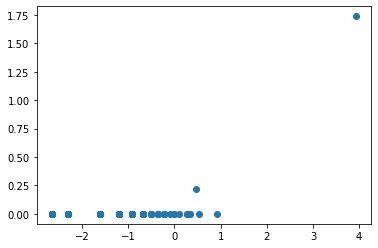

In [653]:
plt.scatter(np.log(cont_data_true_10a), cont_data_MICE_10a)

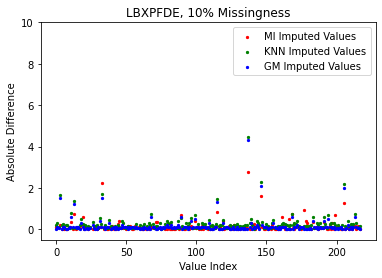

In [ ]:
plt.scatter(range(len(cont_data_true_10a)), np.abs(np.array([cont_data_true_10a]) - np.array([cont_data_MICE_10a])), c='r', s=5, label='MI Imputed Values')
plt.scatter(range(len(cont_data_true_10a)), np.abs(np.array([cont_data_true_10a]) - np.array([cont_data_KNN_10a])), c='g', s=5, label='KNN Imputed Values')
plt.scatter(range(len(cont_data_true_10a)), np.abs(np.array([cont_data_true_10a]) - np.array([cont_data_gm_10a])), c='b', s=5, label='GM Imputed Values')
plt.ylabel('Absolute Difference')
plt.xlabel('Value Index')
plt.ylim(-0.5, 10)
plt.title('LBXPFDE, 10% Missingness')
plt.legend(loc=1, prop={'size': 10})
plt.show()

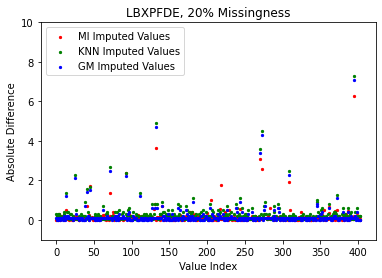

In [ ]:
plt.scatter(range(len(cont_data_true_20a)), np.abs(np.array([cont_data_true_20a]) - np.array([cont_data_MICE_20a])), c='r', s=5, label='MI Imputed Values')
plt.scatter(range(len(cont_data_true_20a)), np.abs(np.array([cont_data_true_20a]) - np.array([cont_data_KNN_20a])), c='g', s=5, label='KNN Imputed Values')
plt.scatter(range(len(cont_data_true_20a)), np.abs(np.array([cont_data_true_20a]) - np.array([cont_data_gm_20a])), c='b', s=5, label='GM Imputed Values')
plt.ylabel('Absolute Difference')
plt.xlabel('Value Index')
plt.title('LBXPFDE, 20% Missingness')
plt.ylim(-1,10)
plt.legend(loc=2)
plt.show()

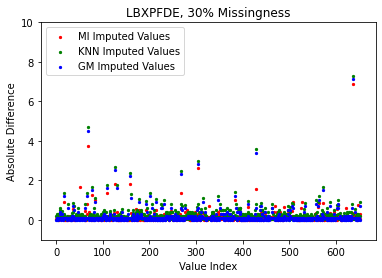

In [ ]:
plt.scatter(range(len(cont_data_true_30a)), np.abs(np.array([cont_data_true_30a]) - np.array([cont_data_MICE_30a])), c='r', s=5, label='MI Imputed Values')
plt.scatter(range(len(cont_data_true_30a)), np.abs(np.array([cont_data_true_30a]) - np.array([cont_data_KNN_30a])), c='g', s=5, label='KNN Imputed Values')
plt.scatter(range(len(cont_data_true_30a)), np.abs(np.array([cont_data_true_30a]) - np.array([cont_data_gm_30a])), c='b', s=5, label='GM Imputed Values')
plt.ylabel('Absolute Difference')
plt.xlabel('Value Index')
plt.title('LBXPFDE, 30% Missingness')
plt.ylim(-1,10)
plt.legend(loc=2)
plt.show()

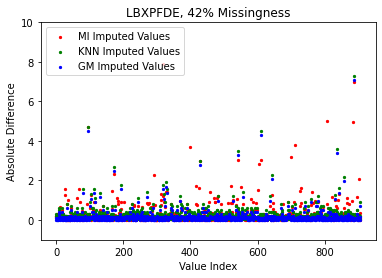

In [ ]:
plt.scatter(range(len(cont_data_true_42a)), np.abs(np.array([cont_data_true_42a]) - np.array([cont_data_MICE_42a])), c='r', s=5, label='MI Imputed Values')
plt.scatter(range(len(cont_data_true_42a)), np.abs(np.array([cont_data_true_42a]) - np.array([cont_data_KNN_42a])), c='g', s=5, label='KNN Imputed Values')
plt.scatter(range(len(cont_data_true_42a)), np.abs(np.array([cont_data_true_42a]) - np.array([cont_data_gm_42a])), c='b', s=5, label='GM Imputed Values')
plt.ylabel('Absolute Difference')
plt.xlabel('Value Index')
plt.title('LBXPFDE, 42% Missingness')
plt.ylim(-1,10)
plt.legend(loc=2)
plt.show()

In [ ]:
# continuous code : LBXPFDE

data10 = [[rmse_10a, av_diff_MICE_10a],
          [rmse_KNN_10a, av_diff_KNN_10a], 
          [rmse_gm_10a, av_diff_gm_10a]]
comparison_10 = pd.DataFrame(data10, columns = ['RMSE', 'Mean Abs. Diff.'], index = ['MICE', 'KNN', 'Geo Mean'])
display(comparison_10)

,RMSE,Mean Abs. Diff.
MICE,0.075822,0.129272
KNN,1.228119,0.290107
Geo Mean,0.413070,0.182800


In [ ]:
data20 = [[rmse_20a, av_diff_MICE_20a], 
          [rmse_KNN_20a, av_diff_KNN_20a], 
          [rmse_gm_20a, av_diff_gm_20a]]
comparison_20 = pd.DataFrame(data20, columns = ['RMSE', 'Mean Abs. Diff.'], index = ['MICE', 'KNN', 'Geo Mean'])
display(comparison_20)

,RMSE,Mean Abs. Diff.
MICE,0.501268,0.248799
KNN,1.230550,0.347250
Geo Mean,0.413070,0.246481


In [ ]:
data30 = [[rmse_30a, av_diff_MICE_30a], 
          [rmse_KNN_30a, av_diff_KNN_30a], 
          [rmse_gm_30a, av_diff_gm_30a]]
comparison_30 = pd.DataFrame(data30, columns = ['RMSE', 'Mean Abs. Diff.'], index = ['MICE', 'KNN', 'Geo Mean'])
display(comparison_30)

,RMSE,Mean Abs. Diff.
MICE,0.865535,0.219895
KNN,1.237899,0.370915
Geo Mean,0.413070,0.273750


In [ ]:
data42 = [[rmse_42a, av_diff_MICE_42a], 
          [rmse_KNN_42a, av_diff_KNN_42a], 
          [rmse_gm_42a, av_diff_gm_42a]]
comparison_42 = pd.DataFrame(data42, columns = ['RMSE', 'Mean Abs. Diff.'], index = ['MICE', 'KNN', 'Geo Mean'])
display(comparison_42)

,RMSE,Mean Abs. Diff.
MICE,0.402849,0.196883
KNN,1.230670,0.298265
Geo Mean,0.413070,0.193474


In [ ]:
cont_data['LBXPFDE'].unique()

array([ 0.2 ,  0.3 ,  0.1 ,  1.7 ,  0.07,  0.6 ,  0.5 ,  1.4 ,  0.4 ,
        1.3 ,  3.3 ,  0.8 ,  0.7 ,  0.9 ,  2.3 ,  1.6 , 51.3 ,  1.1 ,
        4.7 ,  1.8 ,  2.7 ,  2.4 ,  1.  ,  2.1 ,  4.9 ,  1.9 ,  1.2 ,
        2.5 ,  3.6 ,  3.  ,  4.8 ,  1.5 ,  3.5 ,  4.5 , 14.8 ,  2.6 ,
        2.2 ,  7.3 ])

In [ ]:
# print out AUC curves 
# 10%, 252
# 10%, 303
# 10%, 103
# 10%, 207
# 42%, 203
# 42%, 207
# 42%, 252
print("10% Missing, MICE 25 iters AUC: "+str(auc_MICE_10a_252))
print("10% Missing, MICE 20 iters AUC: "+str(auc_MICE_10a))
print("10% Missing, MICE 30 iters AUC: "+str(auc_MICE_10a_303))
print("10% Missing, MICE 10 iters AUC: "+str(auc_MICE_10a_103))
print("10% Missing, MICE 10 iters AUC: "+str(auc_MICE_10a))
# Max AUC for 10% is 20 iterations 

10% Missing, MICE 25 iters AUC: 0.7206959706959706
10% Missing, MICE 20 iters AUC: 0.7094594594594594
10% Missing, MICE 30 iters AUC: 0.6991238550378335
10% Missing, MICE 10 iters AUC: 0.8094161958568737
10% Missing, MICE 10 iters AUC: 0.7094594594594594


In [ ]:
print("42% Missing, MICE 25 iters AUC: "+str(auc_MICE_42a_255))
print("42% Missing, MICE 20 iters AUC: "+str(auc_MICE_42a_203))
print("42% Missing, MICE 30 iters AUC: "+str(auc_MICE_42a_307))
print("42% Missing, MICE 15 iters AUC: "+str(auc_MICE_42a))

# Max AUC for 42% is 20 iterations 

42% Missing, MICE 25 iters AUC: 0.5429452059738554
42% Missing, MICE 20 iters AUC: 0.6166132431720383
42% Missing, MICE 30 iters AUC: 0.5436468646864686
42% Missing, MICE 15 iters AUC: 0.6045103921148489


In [ ]:
print("10% Missing, KNN 2 Neighbors AUC: "+str(auc_KNN_10a_252))
print("10% Missing, KNN 3 Neighbors AUC: "+str(auc_KNN_10a_303))
print("10% Missing, KNN 5 Neighbors AUC: "+str(auc_KNN_10a))
print("10% Missing, KNN 7 Neighbors AUC: "+str(auc_KNN_10a_207))

# Max AUC for 10% is 3 Neighbors

10% Missing, KNN 2 Neighbors AUC: 0.5092592592592593
10% Missing, KNN 3 Neighbors AUC: 0.5921052631578947
10% Missing, KNN 5 Neighbors AUC: 0.563109756097561
10% Missing, KNN 7 Neighbors AUC: 0.5231898565231898


In [ ]:
print("42% Missing, KNN 3 Neighbors AUC: "+str(auc_KNN_42a_203))
print("42% Missing, KNN 5 Neighbors AUC: "+str(auc_KNN_42a))
print("42% Missing, KNN 7 Neighbors AUC: "+str(auc_KNN_42a_307))

# Max AUC for 42% is 5 Neighbors

42% Missing, KNN 3 Neighbors AUC: 0.5
42% Missing, KNN 5 Neighbors AUC: 0.535804585386758
42% Missing, KNN 7 Neighbors AUC: 0.5103822882288229


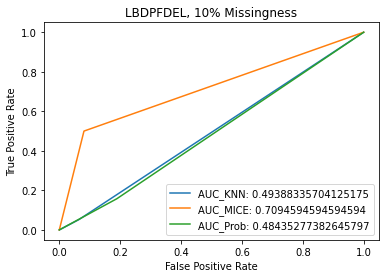

In [ ]:
# binary 
# display ROC curves 

from sklearn import metrics
import matplotlib.pyplot as plt 

#ROC curve

plt.plot(fpr_KNN_10a, tpr_KNN_10a, label='AUC_KNN: '+str(auc_KNN_10a))
plt.plot(fpr_MICE_10a, tpr_MICE_10a, label='AUC_MICE: '+str(auc_MICE_10a))
plt.plot(fpr_prob_10a, tpr_prob_10a, label='AUC_Prob: '+str(auc_prob_10a))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL, 10% Missingness')
plt.legend(loc=4)
plt.show()

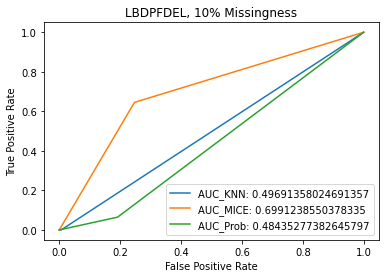

In [ ]:
#ROC curve

plt.plot(fpr_KNN_10a_303, tpr_KNN_10a_303, label='AUC_KNN: '+str(auc_KNN_10a_303))
plt.plot(fpr_MICE_10a_303, tpr_MICE_10a_303, label='AUC_MICE: '+str(auc_MICE_10a_303))
plt.plot(fpr_prob_10a_303, tpr_prob_10a_303, label='AUC_Prob: '+str(auc_prob_10a))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL, 10% Missingness')
plt.legend(loc=4)
plt.show()

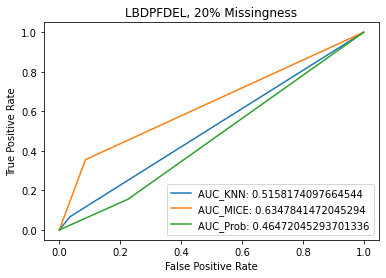

In [ ]:
plt.plot(fpr_KNN_20a, tpr_KNN_20a, label='AUC_KNN: '+str(auc_KNN_20a))
plt.plot(fpr_MICE_20a, tpr_MICE_20a, label='AUC_MICE: '+str(auc_MICE_20a))
plt.plot(fpr_prob_20a, tpr_prob_20a, label='AUC_Prob: '+str(auc_prob_20a))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL, 20% Missingness')
plt.legend(loc=4)
plt.show()

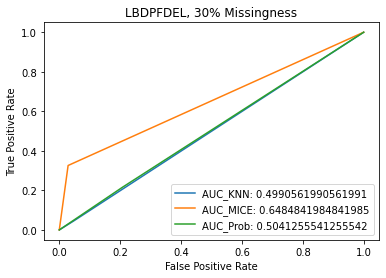

In [ ]:
plt.plot(fpr_KNN_30a, tpr_KNN_30a, label='AUC_KNN: '+str(auc_KNN_30a))
plt.plot(fpr_MICE_30a, tpr_MICE_30a, label='AUC_MICE: '+str(auc_MICE_30a))
plt.plot(fpr_prob_30a, tpr_prob_30a, label='AUC_Prob: '+str(auc_prob_30a))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL, 30% Missingness')
plt.legend(loc=4)
plt.show()

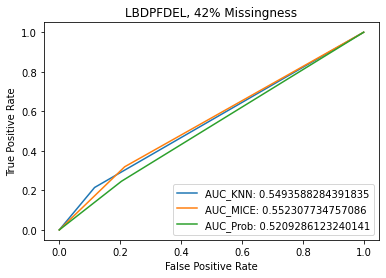

In [ ]:
plt.plot(fpr_KNN_42a, tpr_KNN_42a, label='AUC_KNN: '+str(auc_KNN_42a))
plt.plot(fpr_MICE_42a, tpr_MICE_42a, label='AUC_MICE: '+str(auc_MICE_42a))
plt.plot(fpr_prob_42a, tpr_prob_42a, label='AUC_Prob: '+str(auc_prob_42a))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('LBDPFDEL, 42% Missingness')
plt.legend(loc=4)
plt.show()

In [ ]:
# missingness in PFAS dataset : 
whole_PFAS = df_PFAS_nan.size
dropna_PFAS = df_PFAS.size

print("Size of entire dataframe = "+str(whole_PFAS))
print()
print("Size of dataframe after dropping nan entries = "+str(dropna_PFAS))
print()
print("Percentage of Missingness = "+str(((whole_PFAS-dropna_PFAS)/whole_PFAS)*100))

Size of entire dataframe = 39763

Size of dataframe after dropping nan entries = 36856

Percentage of Missingness = 7.310816588285592


# Missingness in Original PFAS data

In [ ]:
size1 = df_PFAS.size
size2 = df_PFAS_nan.size
percentage_missing = ((size2-size1)/size2)*100

print(percentage_missing)

7.310816588285592


In [ ]:
nan_list = []

for col in df_PFAS_nan.columns:
  for row in range(len(df_PFAS_nan)):
    if math.isnan(df_PFAS_nan.iloc[row][col]):
      nan_list.append((row, col))

In [ ]:
df_PFAS_nan.columns

Index(['SEQN', 'LBXPFDE', 'LBDPFDEL', 'LBXPFHS', 'LBDPFHSL', 'LBXMPAH',
       'LBDMPAHL', 'LBXPFBS', 'LBDPFBSL', 'LBXPFHP', 'LBDPFHPL', 'LBXPFNA',
       'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL', 'LBXPFDO', 'LBDPFDOL'],
      dtype='object')

In [ ]:
LBXPFDE_list = []
LBDPFDEL_list = []
LBXPFHS_list = []
LBDPFHSL_list = []
LBXMPAH_list = []
LBDMPAHL_list = []
LBXPFBS_list = []
LBDPFBSL_list = []
LBXPFHP_list = []
LBDPFHPL_list = []
LBXPFNA_list = []
LBDPFNAL_list = []
LBXPFUA_list = []
LBDPFUAL_list = []
LBXPFDO_list = []
LBDPFDOL_list = []

for i in nan_list:
  col = i[1]
  row = i[0]
  if col == 'LBXPFDE':
    LBXPFDE_list.append(row)
  if col == 'LBDPFDEL':
    LBDPFDEL_list.append(row)
  if col == 'LBXPFHS':
    LBXPFHS_list.append(row)   
  if col == 'LBDPFHSL':
    LBDPFHSL_list.append(row)  
  if col == 'LBXMPAH':
    LBXMPAH_list.append(row) 
  if col == 'LBDMPAHL':
    LBDMPAHL_list.append(row) 
  if col == 'LBXPFBS':
    LBXPFBS_list.append(row) 
  if col == 'LBDPFBSL':
    LBDPFBSL_list.append(row) 
  if col == 'LBXPFHP':
    LBXPFHP_list.append(row)
  if col == 'LBDPFHPL':
    LBDPFHPL_list.append(row)  
  if col == 'LBXPFNA':
    LBXPFNA_list.append(row)  
  if col == 'LBDPFNAL':
    LBDPFNAL_list.append(row)  
  if col == 'LBXPFUA':
    LBXPFUA_list.append(row)  
  if col == 'LBDPFUAL':
    LBDPFUAL_list.append(row)  
  if col == 'LBXPFDO':
    LBXPFDO_list.append(row)  
  if col == 'LBDPFDOL':
    LBDPFDOL_list.append(row)  

In [ ]:
LBXPFDE_list
LBDPFDEL_list
LBXPFHS_list
LBDPFHSL_list
LBXMPAH_list
LBDMPAHL_list
LBXPFBS_list 
LBDPFBSL_list
LBXPFHP_list
LBDPFHPL_list 
LBXPFNA_list 
LBDPFNAL_list 
LBXPFUA_list 
LBDPFUAL_list 
LBXPFDO_list 
LBDPFDOL_list 

print(LBXPFDE_list == LBDPFDEL_list)
print(LBDPFDEL_list == LBXPFHS_list)
print(LBXPFHS_list == LBDPFHSL_list)
print(LBDPFHSL_list == LBXMPAH_list)
print(LBXMPAH_list == LBDMPAHL_list)
print(LBDMPAHL_list == LBXPFBS_list)
print(LBXPFBS_list == LBDPFBSL_list)
print(LBDPFBSL_list == LBXPFHP_list)
print(LBXPFHP_list == LBDPFHPL_list)
print(LBDPFHPL_list == LBXPFNA_list)
print(LBXPFNA_list == LBDPFNAL_list)
print(LBDPFNAL_list == LBXPFUA_list)
print(LBXPFUA_list == LBDPFUAL_list)
print(LBDPFUAL_list == LBXPFDO_list)
print(LBXPFDO_list == LBDPFDOL_list)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
